# Table of contents
1. [Purpose](#purpose)
2. [Inputs](#inputs)
3. [Outputs](#outputs)
4. [Constraints](#constraints)
5. [Dependencies](#dependencies)
    * [5.1 Code Language](#codelanguage)
      * [5.1.1 package requirements](#packagerequirements)

6. [Code](#code)
    * [6.1 Management Summary](#code61)
    * [6.2 Protection Status Summary](#code62)
    * [6.3 Protection Level of Macrogroups by Ecoregion](#code63)
    * [6.4 Protection Level of Groups by Ecoregion](#code64)
    * [6.5 PAD Status Level (1-4) Percentages by Ecoregion](#code65)
7. [Tests](#tests)
8. [Provenance](#provenance)
9. [Citations](#citations)
---

<h1><center>Quantifying the Representation of Plant Communities<br/>in the Protected Areas of the United States</center></h1>
<br/>

## Purpose <a name="purpose"></a>
The recent release of the USNVC Classification allows for the first time an assessment of the conservation status of the Groups and Macrogroups of the conterminous U.S.  While a previous assessment focused on detailed land cover based on NatureServe’s Ecological System Classification (Aycrigg et al. 2013), a cross-walk between that map legend and the NVC, as well as an update to the map itself provides for an assessment based on 2011 conditions and the mid-levels of the National Vegetation Classification Hierarchy. Specifically, by combining the GAP/LANDFIRE National Terrestrial Ecosystems data with USGS’s Gap Analysis Projects Protected Areas Database of the U.S. we were able to quantify the level of representation of each of the mapped existing vegetation types.

## Inputs <a name="inputs"></a>
The code in this notebook is intended to provide summaries for NVC vegetation types at multiple levels of the classification hierarchy. Summaries include information about the area occupied by each type, the percent of that area protected at GAP status 1 & 2, and 1, 2, & 3, and the area of each type being managed by ferderal and state agencies.
    
It utilizes a raster spatial data layer that was assembled by intersecting numerous spatial data layers including the PAD-US, boundary layers such as states, counties, LCCs, ecoregions, etc. At the time this workflow was developed, the raster dataset was available on a local server. Hence, all code references a local instance of this dataset. This code is only replicable given access to a local instance of the raster dataset.

These analyses rely on four major datasets including:
1. The detailed land cover dataset: GAP/LANDFIRE Existing Vegetation Type 2016 (https://www.landfire.gov/version_download.php)
2. The Protected Areas Database of the U.S. Version 2.1 (https://www.sciencebase.gov/catalog/item/5f186a2082cef313ed843257)
3. The U.S. National Vegetation Classification Version 2.0 (http://usnvc.org/explore-classification/)
4. A crosswalk between Ecological Systems and the USNVC Types (Embedded in the Attribute file for the National Terrestrials Ecosystems data https://www.sciencebase.gov/catalog/item/5810cd6fe4b0f497e7975237.

## Outputs <a name="outputs"></a>
Charts visualizing the extent of USNVC classes across various agencies and protection levels throughout CONUS under [four PAD-US protection status levels](https://www.usgs.gov/core-science-systems/science-analytics-and-synthesis/gap/science/pad-us-data-overview?qt-science_center_objects=0#qt-science_center_objects):  
<ul>
<ul>
    <li>Status 1: Biodiversity protection - natural disturbance permitted</li>
    <li>Status 2: Biodiversity protection - natural disturbance suppressed</li>
    <li>Status 3: Multiple use - extraction permitted</li>
    <li>Status 4: No known mandate for protection</li>
</ul>
</ul>

---
* [Management by USNVC Class:](#managechart)

Shows the area of each Class level vegetation type (Forest & Woodland; Shrub & Herbaceous Vegetation; Desert & Semi-Desert Vegetation...) managed by major federal and state management agencies

---
* [Protected Status of USNVC Groups:](#protectionchart)

A box plot summarizing the percent of the mapped area for each group that is protected at Status 1 & 2 and Status 1, 2 & 3 within each USNVC Class

---
* [Protection Level of USNVC Macrogroups by Ecoregion:](#macrogroupchart)
* [Protection Level of USNVC Groups by Ecoregion:](#groupchart)

Horizontal bar plots summarizing the number of USNVC Macrogroups and Groups considered "protected" at Status 1 & 2 within Level II Ecoregions across four bins of percent protected:
<ul>
<ul>
   <li>< 1% Protected</li>
   <li>1 - 17 % Protected</li>
   <li>17 - 30 % Protected</li>
   <li>> 30% Protected</li>
</ul>
</ul>

---
* [PAD Level Percentages by Ecoregion (PAD Status Levels 1-4):](#ecostackchart)

Stacked bar plot illustrating the percentage of an Ecoregion in each of four PAD Status groupings using all PAD Status levels 1-4:
<ul>
<ul>
   <li>% PAD 1 & 2 (i.e. "protected")</li>
   <li>% PAD 3 (i.e "multiple use")</li>
   <li>% PAD 4 Converted ("no protection"; lands in developed or agricultural classes)</li>
   <li>% PAD 4 Not Converted ("no protection"; lands with natural, ruderal or plantation vegetation)</li>
</ul>
</ul>


## Constraints <a name="constraints"></a>
The Land Cover data attempts to map as accurately as possible the fine vegetative details of the nation’s vegetation. However, there are some limitations to the data that users should keep in mind. The data set uses a 30 meter pixel cell and in most areas a minimum mapping unit of 0.4 ha (1 acre). This means that small patches of vegetation can be missed in the modeling process.  The USNVC is a dynamic content standard, reflecting the state of the science at any point in time; therefore this analysis represents the conservation assessment based on the types that were named and described in the 2017 release of the classification.  

## Dependencies <a name="dependencies"></a>
These analyses are currently reliant on a local instance of a raster dataset that is a combination of PAD-US, Omernik Ecoregions and the National Vegetation Classification dataset.

Code execution and output visualization dependencies

* **Code Language** <a name="codelanguage"></a>  
This code is written in Python 3.x. Earlier versions may be compatible given slight alterations in syntax and package components.
  * **Python package requirements** <a name="packagerequirements"></a>  
  The required packages for proper code execution inlclude:
    - Pandas version 0.2x or above
    - GeoPanadas version 0.6x or above
    - numpy version 1.14.x or above
    - seaborn (statistical data visualization package) version 0.8 or above
    - matplotlib (figures library) version2.2.x or above
    - bokeh (interactive HTML charting package) version 0.12.x or above


## Tests <a name="tests"></a>
In developing this code the results were compared against a dataset generated through an independent spatial analysis.  

This analysis represents a CONUS wide assessment of the conservation status of natural vegetation.  It serves as an important baseline assessment of the extent, protection status, and management of those vegetation types. 

## Provenance <a name="provenance"></a>


## Code <a name="code"></a>

#### Import required Python packages

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib notebook

#### Accessing local spatial data layers and tables

In [2]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#            ++++ Directory Locations ++++
workDir = "D:/USGS Analyses/USNVC-Analyses/"
dataDir = workDir+"data/"

# Read the local CSV data table into a Dataframe
dfAtt = pd.read_csv(dataDir+"attribute_table.csv")
# Read the raster attribute table of the spatial overlay layer into a Dataframe
gdfRas = gpd.read_file(dataDir+"nvcpader21.img.vat.dbf")


In [3]:
# Make all the column names in the CSV data table uppercase
dfAtt.columns = [x.upper() for x in dfAtt.columns]

In [4]:
# Pull out only the relevant columns from the data table
dfSub = dfAtt[['GAPST_CD',
'MANG_NAME',
'MANG_TYPE',
'CLASS',
'NVCGRP_LOOKUP2',
'GROUP_CODE',
'GROUP',
'PADUS2_1DISS6ATT',
'ECOREGIONS_L4',
'NVC_NAME',
'NVC_CLASS',
'MACROGROUP',
'MACROGRO_1',
'US_L4CODE',
'US_L4NAME',
'US_L3CODE',
'US_L3NAME',
'NA_L2CODE',
'NA_L2NAME']]

# Make sure there are no duplicate rows
dfTable = dfSub.drop_duplicates()

# Drop the geometery column from the GeoDataframe of the raster attribute table
dfRAT = gdfRas.drop(['geometry'], axis=1)


############# Create the overall dataframe that is used in all subsequent analyses #############
## Merge the raster attribute table with the subsetted attribute CSV
dfMerge = pd.merge(left=dfRAT, right=dfTable, how='inner',
                   left_on=['NVCGRP_LOO','ECOREGIONS','PADUS2_1DI'],
                   right_on=['NVCGRP_LOOKUP2','ECOREGIONS_L4','PADUS2_1DISS6ATT'])

### Export the merged dataframe to a CSV
#dfMerge.to_csv(dataDir+"NVCAnalysesMergedTable.csv", index=False)


In [5]:
dfMerge

,VALUE,COUNT,PADUS2_1DI,ECOREGIONS,NVCGRP_LOO,GAPST_CD,MANG_NAME,MANG_TYPE,CLASS,NVCGRP_LOOKUP2,...,NVC_NAME,NVC_CLASS,MACROGROUP,MACROGRO_1,US_L4CODE,US_L4NAME,US_L3CODE,US_L3NAME,NA_L2CODE,NA_L2NAME
0,1,51,1614,315,385,3,County Land,Local Government,7 Agricultural & Developed Vegetation,385,...,Western Cool Temperate Developed Ruderal Everg...,7.0,M550,Tree Developed Vegetation,2a,Fraser Lowland,2,Puget Lowland,7.1,MARINE WEST COAST FOREST
1,2,33735,5000,315,85,4,Unknown,Unknown,1 Forest & Woodland,85,...,North Pacific Maritime Douglas-fir-Western Hem...,1.0,M024,Vancouverian Lowland & Montane Forest,2a,Fraser Lowland,2,Puget Lowland,7.1,MARINE WEST COAST FOREST
2,3,866,5000,315,0,4,Unknown,Unknown,NaN,0,...,NoData,NaN,NaN,NaN,2a,Fraser Lowland,2,Puget Lowland,7.1,MARINE WEST COAST FOREST
3,4,62,1614,315,384,3,County Land,Local Government,7 Agricultural & Developed Vegetation,384,...,Western Cool Temperate Developed Ruderal Decid...,7.0,M550,Tree Developed Vegetation,2a,Fraser Lowland,2,Puget Lowland,7.1,MARINE WEST COAST FOREST
4,5,120,1614,315,359,3,County Land,Local Government,Developed-Low Intensity,359,...,Developed-Low Intensity,8.0,8.A,Developed-Low Intensity,2a,Fraser Lowland,2,Puget Lowland,7.1,MARINE WEST COAST FOREST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864463,864464,5,2828,828,402,4,Department of Defense,Federal,7 Agricultural & Developed Vegetation,402,...,Eastern Warm Temperate Developed Ruderal Shrub...,7.0,M550,Tree Developed Vegetation,76d,Southern Coast and Islands,76,Southern Florida Coastal Plain,15.4,EVERGLADES
864464,864465,40,2417,828,360,3,State Park and Recreation,State,Developed-Medium Intensity,360,...,Developed-Medium Intensity,8.0,8.A,Developed-Medium Intensity,76d,Southern Coast and Islands,76,Southern Florida Coastal Plain,15.4,EVERGLADES
864465,864466,9,2417,828,361,3,State Park and Recreation,State,Developed-High Intensity,361,...,Developed-High Intensity,8.0,8.A,Developed-High Intensity,76d,Southern Coast and Islands,76,Southern Florida Coastal Plain,15.4,EVERGLADES
864466,864467,12,42,828,164,1,U.S. Fish and Wildlife Service,Federal,2 Shrub & Herb Vegetation,164,...,South Atlantic & Gulf Grass Coast & Dune,2.0,M057,Eastern North American Dune & Coastal Grasslan...,76d,Southern Coast and Islands,76,Southern Florida Coastal Plain,15.4,EVERGLADES


#### There are two Group Codes that have more than one Group Name:
* G089	Great Lakes Sand Beach
* G089	Great Lakes Shrub & Grass Dune
* G559	Cool Semi-Desert Shrub & Herb Wash-Arroyo
* G559	Great Basin-Intermountain Shrub & Herb Wash-Arroyo
#### Make these into a single code by renaming:
* Great Lakes Sand Beach and Great Lakes Shrub & Grass Dune become ==> Great Lakes Dune
* Cool Semi-Desert Shrub & Herb Wash-Arroyo becomes ==> Great Basin-Intermountain Shrub & Herb Wash-Arroyo

In [6]:
dfMerge.loc[(dfMerge.GROUP == 'Great Lakes Sand Beach'),'GROUP']='Great Lakes Dune'
dfMerge.loc[(dfMerge.GROUP == 'Great Lakes Shrub & Grass Dune'),'GROUP']='Great Lakes Dune'
dfMerge.loc[(dfMerge.GROUP == 'Cool Semi-Desert Shrub & Herb Wash-Arroyo'),'GROUP']='Great Basin-Intermountain Shrub & Herb Wash-Arroyo'


### ******* Management Summary ******* <a name="code61"></a>
---

#### Select rows that are 'Natural/Non-anthropogenic' types of USNVC Classes
##### <i>Include the Group: <u>Eastern North American Temperate Forest Plantation</u> to indentify potential areas of restortation opportunities under various management types</i>

This means including the Class '7 Agricultural & Developed Vegetation'

In [7]:
# Pull out only the natural/non-anthropogenic NVC classes
# !! To add Eastern North American Temperate Forest Plantation
#    Agricultural & Developed Vegetation needs to be included !!

df = dfMerge[(dfMerge['CLASS'] == '1 Forest & Woodland') | 
      (dfMerge['CLASS'] == '2 Shrub & Herb Vegetation') | 
      (dfMerge['CLASS'] == '3 Desert & Semi-Desert') | 
      (dfMerge['CLASS'] == '4 Polar & High Montane Scrub Grassland & Barrens') | 
      (dfMerge['CLASS'] == '6 Open Rock Vegetation') | 
      (dfMerge['CLASS'] == '7 Agricultural & Developed Vegetation')]

#### Exclude all BUT Eastern North American Temperate Forest Plantation from the dataframe rows

In [8]:
# Exclude all but Eastern Temperate Forest Plantations from Agricultural & Developed CLASS

idxNotPlt = df[(df['CLASS']=='7 Agricultural & Developed Vegetation') 
               & ~(df['GROUP'].str.contains('Plantation'))].index
df.drop(idxNotPlt, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
# Replace the "7 Agricultural & Developed Vegetation" CLASS name with
#   "7 Eastern Plantation" since that is the only GROUP name remaining
df['CLASS'] = np.where(df['CLASS']==
   '7 Agricultural & Developed Vegetation',
   '7 Eastern Plantation', df['CLASS'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
classnames = df['CLASS'].unique().tolist()
classnames

['1 Forest & Woodland',
 '2 Shrub & Herb Vegetation',
 '6 Open Rock Vegetation',
 '3 Desert & Semi-Desert',
 '4 Polar & High Montane Scrub Grassland & Barrens',
 '7 Eastern Plantation']

#### Summarizing Areal Extent of NVC Classes Using Raster Cell Counts

In [11]:
## Summarize cell counts across Manager Name and Type, GAP Status, and NVC Class
sSum = df.groupby(['GAPST_CD','MANG_NAME','MANG_TYPE','CLASS'])['COUNT'].sum()
dfSum = pd.DataFrame(data=sSum)
dfClassSum = dfSum.reset_index()

# Rename the columns to match previous analyses dataframes
dfClassSum.rename(columns={'GAPST_CD':'PADStatus',
                           'MANG_NAME':'ManageName',
                           'MANG_TYPE':'ManageType',
                           'COUNT':'nCells'},inplace=True)

In [12]:
# Add a column for NVC Class that removes the numbers from the names
dfClassSum['NVCClass'] = dfClassSum['CLASS'].str[2:]
# Drop the 'CLASS' column
dfClassSum = dfClassSum.drop(['CLASS'], axis=1)
# Reorder the columns
dfClassSum = dfClassSum[['PADStatus','ManageName','ManageType','NVCClass','nCells']]

#### Add a new column for area in square kilometers -- (ignore the Python warnings if any)

In [13]:
# Add a new column for area in square kilometers
print("Calculating Area in km2 ....")
dfClassSum['km2'] = dfClassSum['nCells']*0.0009

Calculating Area in km2 ....


#### Add a new column ManageCat that standarizes management types

In [14]:
mangnames = dfClassSum['ManageName'].unique().tolist()
mangnames

['Army Corps of Engineers',
 'Bureau of Land Management',
 'City Land',
 'County Land',
 'Forest Service',
 'Joint',
 'National Park Service',
 'Non-Governmental Organization',
 'Other or Unknown Federal Land',
 'Other or Unknown Local Government',
 'Other or Unknown State Land',
 'Private',
 'Regional Agency Land',
 'Regional Water Districts',
 'State Department of Conservation',
 'State Department of Land',
 'State Department of Natural Resources',
 'State Fish and Wildlife',
 'State Land Board',
 'State Park and Recreation',
 'Tennessee Valley Authority',
 'U.S. Fish and Wildlife Service',
 'Unknown',
 'Agricultural Research Service',
 'American Indian Areas',
 'Bureau of Reclamation',
 'Department of Defense',
 'Natural Resources Conservation Service',
 'Other',
 'National Oceanic and Atmospheric Administration',
 'Bonneville Power Administration',
 'Department of Energy']

In [15]:
# Add a new column ManageCat that standarizes management types
categories = {'Bureau of Land Management':'Bureau of Land Management',
'Forest Service':'Forest Service',
'National Park Service':'National Park Service',
'U.S. Fish & Wildlife Service':'U.S. Fish & Wildlife Service',
'U.S. Fish and Wildlife Service':'U.S. Fish & Wildlife Service',
'American Indian Lands':'Other',
'American Indian Areas':'Other',
'City Land':'Other',
'County Land':'Other',
'Joint':'Other',
'Non-Governmental Organization':'Other',
'Other':'Other',
'Other or Unknown Local Government':'Other',
'Private':'Other',
'Private-not in PADUS':'Other',
'Regional Agency Land':'Other',
'Regional Water Districts':'Other',
'Unknown':'Other',
'Agricultural Research Service':'Other Federal',
'Army Corps of Engineers':'Other Federal',
'Bonneville Power Administration':'Other Federal',
'Bureau of Indian Affairs':'Other Federal',
'Bureau of Reclamation':'Other Federal',
'Department of Defense':'Other Federal',
'Department of Energy':'Other Federal',
'National Oceanic and Atmospheric Administration':'Other Federal',
'Other or Unknown Federal Land':'Other Federal',
'Tennessee Valley Authority':'Other Federal',
'Natural Resources Conservation Service':'Other Federal',
'Other or Unknown State Land':'State',
'State Department of Conservation':'State',
'State Department of Land':'State',
'State Department of Natural Resources':'State',
'State Fish and Wildlife':'State',
'State Land Board':'State',
'State Park and Recreation':'State'}
print("Adding a Management Category Column ....")
dfClassSum['ManageCat'] = dfClassSum['ManageName'].map(categories)

Adding a Management Category Column ....


#### Remove the PAD status 4 records and shorten the "Polar" class text

In [16]:
# Make a new dataframe excluding PAD status 4 records
df3 = dfClassSum[(dfClassSum['PADStatus'] != 4)]
# Shorten the class text 'Polar & High Montane Scrub, Grassland & Barrens'
#  to 'Polar & High Montane' for better plotting
df3['NVCClass'] = np.where(df3['NVCClass']==
   'Polar & High Montane Scrub Grassland & Barrens',
   'Polar & High Montane', df3['NVCClass'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [17]:
df3

,PADStatus,ManageName,ManageType,NVCClass,nCells,km2,ManageCat
0,1,Army Corps of Engineers,Federal,Forest & Woodland,109180,98.2620,Other Federal
1,1,Army Corps of Engineers,Federal,Shrub & Herb Vegetation,21421,19.2789,Other Federal
2,1,Army Corps of Engineers,Federal,Open Rock Vegetation,18,0.0162,Other Federal
3,1,Army Corps of Engineers,Federal,Eastern Plantation,236,0.2124,Other Federal
4,1,Bureau of Land Management,Federal,Forest & Woodland,6118453,5506.6077,Bureau of Land Management
...,...,...,...,...,...,...,...
433,3,U.S. Fish and Wildlife Service,Federal,Eastern Plantation,1254,1.1286,U.S. Fish & Wildlife Service
434,3,Unknown,Unknown,Forest & Woodland,114609,103.1481,Other
435,3,Unknown,Unknown,Shrub & Herb Vegetation,7568,6.8112,Other
436,3,Unknown,Unknown,Desert & Semi-Desert,188,0.1692,Other


#### Manipulate the dataframe to organize data in preparation of plotting

In [18]:
# -----------------------------------------------------------------------------
# Manipulate the dataframe to organize data to use as the plotting source

# Add a Status column based on PAD Status to summarize area protection
print("  adding protection status column ...")
df3['Status'] = np.where(df3['PADStatus']==3, 'Multiple Use', 'Protected')

# Drop PADStatus, ManageName, and nCellSum
df3 = df3.drop(['PADStatus','ManageName','nCells'], axis=1)
# There is no entry of 'Multiple Use' (i.e. status 3) for Polar & High Montane
#   - 'Other Federal' or - 'U.S. Fish & Wildlife Service' in the data making 
#   the records for status pairs uneven.
#  Add a row that is 0 for these criteria
dfa = pd.DataFrame([['Polar & High Montane',0.0,'Other Federal','Multiple Use'],
                   ['Polar & High Montane',0.0,'U.S. Fish & Wildlife Service','Multiple Use']],
                   columns=['NVCClass','km2','ManageCat','Status'])
df3 = df3.append(dfa, ignore_index=True)

# Summarize protection area by category, class, and status
print("  summarizing protection area by category, class and status ...")
dfSumKm = df3.groupby(by=['ManageCat','NVCClass','Status'])['km2'].sum().reset_index()
# Make a column of tupled category and class to index off
dfSumKm['CatCls'] = list(zip(dfSumKm['ManageCat'], dfSumKm['NVCClass']))
# Drop ManageCat and NVCClass columns
dfSumKm = dfSumKm.drop(['ManageCat','NVCClass'], axis=1)

# Pivot on Status and make the tupled category and class column the index
print("  pivoting on status column ...")
df4 = dfSumKm.pivot(index='CatCls', columns='Status', values='km2')
# Reorder columns
df4 = df4[['Protected', 'Multiple Use']]

# Reorder the rows using a preset order dictionary
print("  reordering rows ...")
sort = {('Bureau of Land Management', 'Forest & Woodland'):1,
('Bureau of Land Management', 'Shrub & Herb Vegetation'):2,
('Bureau of Land Management', 'Desert & Semi-Desert'):3,
('Bureau of Land Management', 'Polar & High Montane'):4,
('Bureau of Land Management', 'Open Rock Vegetation'):5,
('Bureau of Land Management', 'Eastern Plantation'):6,
('Forest Service', 'Forest & Woodland'):7,
('Forest Service', 'Shrub & Herb Vegetation'):8,
('Forest Service', 'Desert & Semi-Desert'):9,
('Forest Service', 'Polar & High Montane'):10,
('Forest Service', 'Open Rock Vegetation'):11,
('Forest Service', 'Eastern Plantation'):12,
('National Park Service', 'Forest & Woodland'):13,
('National Park Service', 'Shrub & Herb Vegetation'):14,
('National Park Service', 'Desert & Semi-Desert'):15,
('National Park Service', 'Polar & High Montane'):16,
('National Park Service', 'Open Rock Vegetation'):17,
('National Park Service', 'Eastern Plantation'):18,
('U.S. Fish & Wildlife Service', 'Forest & Woodland'):19,
('U.S. Fish & Wildlife Service', 'Shrub & Herb Vegetation'):20,
('U.S. Fish & Wildlife Service', 'Desert & Semi-Desert'):21,
('U.S. Fish & Wildlife Service', 'Polar & High Montane'):22,
('U.S. Fish & Wildlife Service', 'Open Rock Vegetation'):23,
('U.S. Fish & Wildlife Service', 'Eastern Plantation'):24,
('Other Federal', 'Forest & Woodland'):25,
('Other Federal', 'Shrub & Herb Vegetation'):26,
('Other Federal', 'Desert & Semi-Desert'):27,
('Other Federal', 'Polar & High Montane'):28,
('Other Federal', 'Open Rock Vegetation'):29,
('Other Federal', 'Eastern Plantation'):30,
('State', 'Forest & Woodland'):31,
('State', 'Shrub & Herb Vegetation'):32,
('State', 'Desert & Semi-Desert'):33,
('State', 'Polar & High Montane'):34,
('State', 'Open Rock Vegetation'):35,
('State', 'Eastern Plantation'):36,
('Other', 'Forest & Woodland'):37,
('Other', 'Shrub & Herb Vegetation'):38,
('Other', 'Desert & Semi-Desert'):39,
('Other', 'Polar & High Montane'):40,
('Other', 'Open Rock Vegetation'):41,
('Other', 'Eastern Plantation'):42}

# Make a new dataframe by resetting the df4 index
df5 = df4.reset_index()
# Add the sortid column for sorting then sort
df5['sortid'] = df5['CatCls'].map(sort)
df5sort = df5.sort_values(by='sortid')
# Drop the sortid column then change the index back to CatCls
dfSource = df5sort.drop(['sortid'],axis=1)
dfSource = dfSource.set_index(keys=['CatCls'])
# Add a total km2 column
dfSource['Total Area'] = dfSource['Protected'] + dfSource['Multiple Use']

  adding protection status column ...
  summarizing protection area by category, class and status ...
  pivoting on status column ...
  reordering rows ...


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Import the bokeh package for plotting a bar chart figure

In [19]:
'''

    Plot stacked bar plots

'''
print("===== Begin Plotting =====")
# Using bokeh to plot with hierarchical labeling
from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.models import NumeralTickFormatter, HoverTool

# Bokeh generates an HTML file for the figure
output_file(workDir + "ManagementSummary.html")

===== Begin Plotting =====


### Management by NVC Class <a name="managechart"></a>
#### Configure the data and create an HTML file of the stacked bar chart

Note that the HTML file of the bar chart figure is interactive. There is a toolbar on the right side of the chart area.

In [20]:
# +++++++++++++++++++++++++++++++++++++++ Plotting +++++++++++++++++++++++++++++++++++++++++++++++++++
print("+++++ Sending Plot to HTML File +++++")
colors = ['#286000','#a6e883'] # Protected | Multiple Use
p = figure(title="Management by USNVC Class", plot_width=1100, x_range=FactorRange(*dfSource.index))

tt = HoverTool(
tooltips=[
    ("Protected", "@Protected{0,0}"),
    ("Multiple Use", "@{Multiple Use}{0,0}"),
    ("Total", "@{Total Area}{0,0}")
    ]
)
#lab = ["Protected","Multiple Use"]
legendList=[value(x) for x in dfSource.columns[0:2]]
p.vbar_stack(dfSource.columns[0:2], x='CatCls', width=0.8, color=colors, 
             source=dfSource, legend_label=["Protected","Multiple Use"]) 

p.add_tools(tt)
p.title.align = "center"
p.title.text_font_size = '12pt'
p.legend.location = "top_center"
p.legend.orientation = "horizontal"
p.xaxis.major_label_orientation = 1.55
p.xaxis.axis_label_text_font_style = "normal"
p.y_range.start = 0
p.y_range.end = 150000
p.yaxis[0].formatter = NumeralTickFormatter(format="0,0")
p.yaxis.axis_label = "Square Kilometers"
p.yaxis.axis_label_text_font_style = "normal"

show(p)

+++++ Sending Plot to HTML File +++++


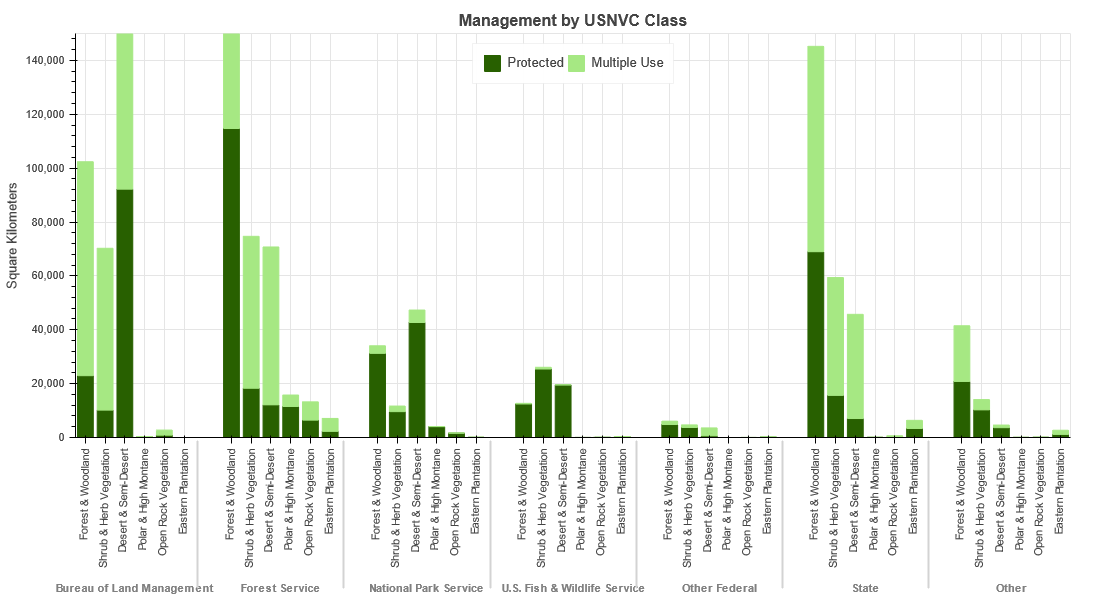

In [21]:
# The following will render the HTML file in the notebook using a local file source
from IPython.core.display import display, HTML, Image
#display(HTML(filename=workDir + "/ManagementSummary.html"))
# To display this on GitHub, render a screenshot image
repoDir = "D:/USGS Analyses/USNVC-Analyses"
display(Image(filename=repoDir + '/ManagementSummaryImage.png', embed=True))

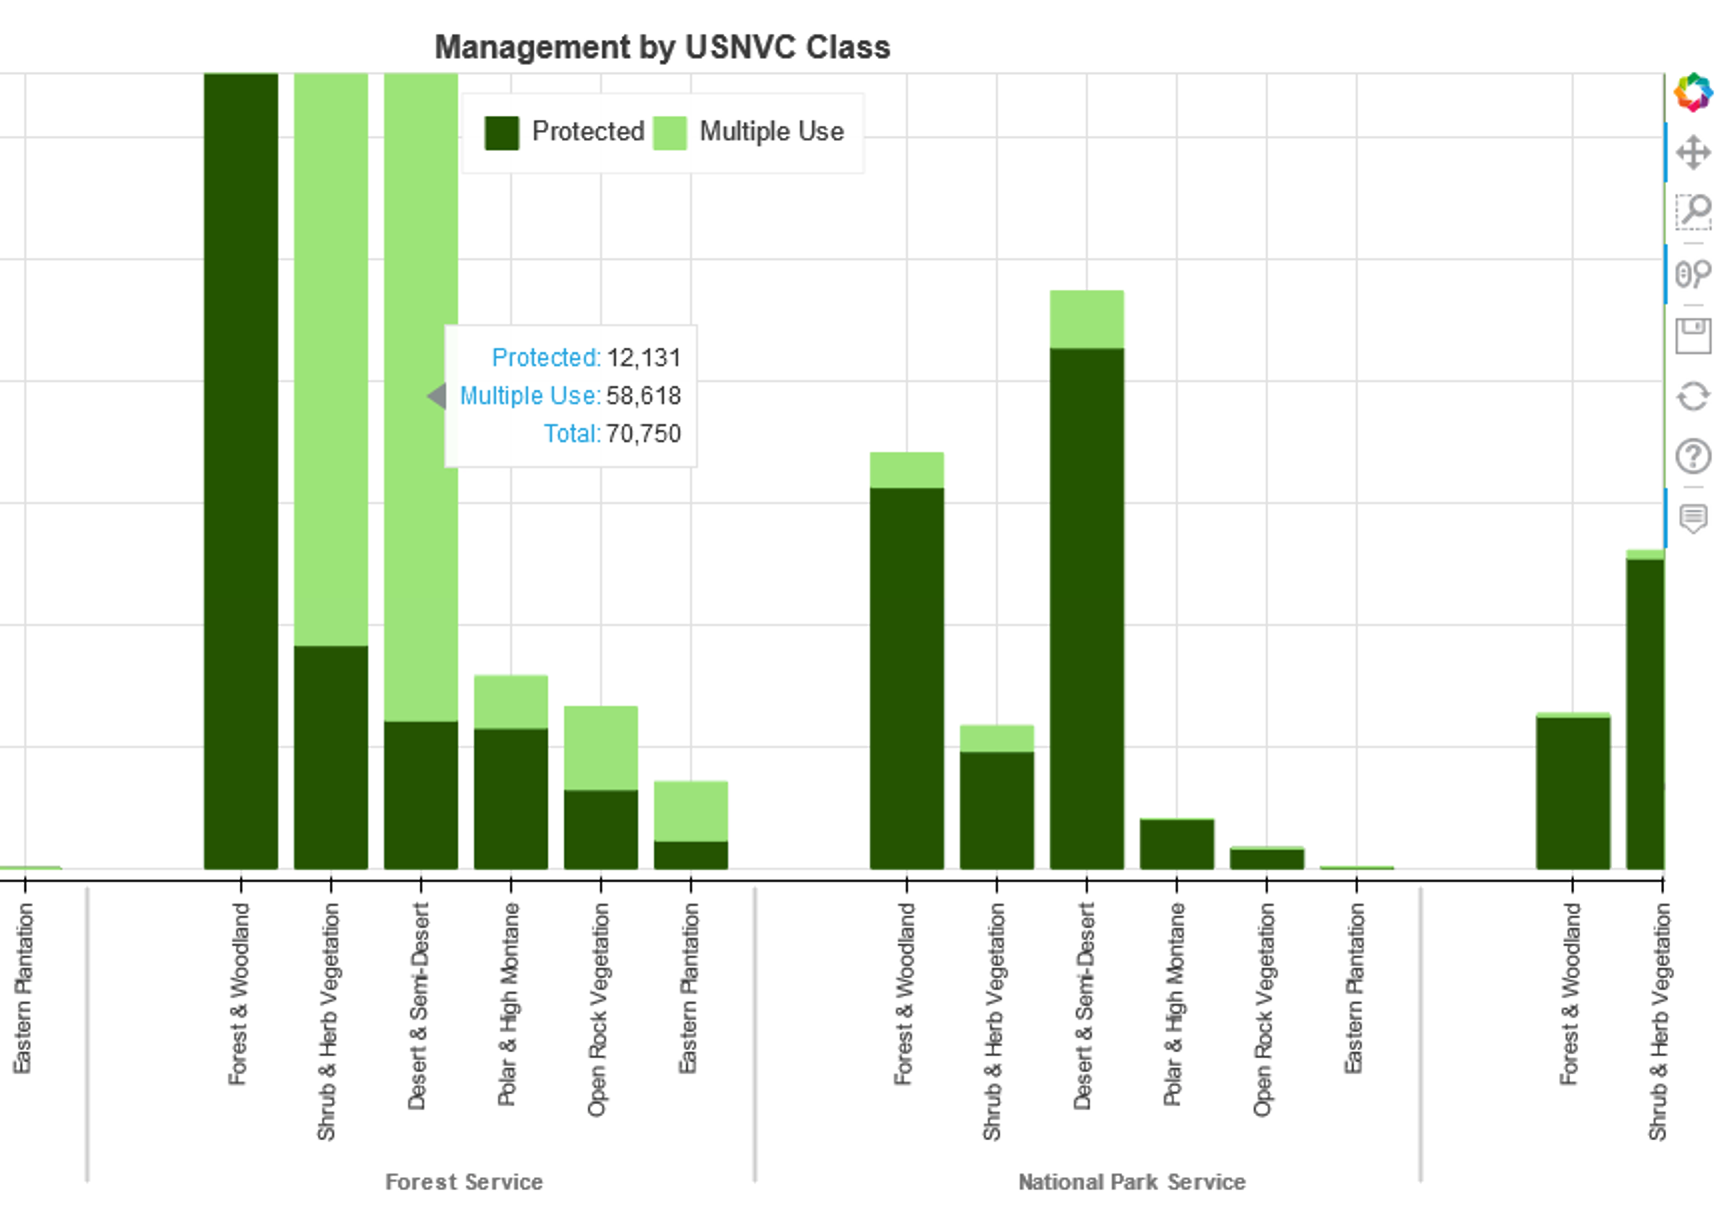

In [22]:
display(Image(filename=workDir + '/BokehPlotZoom.png', embed=True))

### ******* Protection Status Summary ******* <a name="code62"></a>
---

#### Summarize NVC Groups, Classes, and PAD Status using the Merged Dataframe

In [21]:
dfMerge.columns

Index(['VALUE', 'COUNT', 'PADUS2_1DI', 'ECOREGIONS', 'NVCGRP_LOO', 'GAPST_CD',
       'MANG_NAME', 'MANG_TYPE', 'CLASS', 'NVCGRP_LOOKUP2', 'GROUP_CODE',
       'GROUP', 'PADUS2_1DISS6ATT', 'ECOREGIONS_L4', 'NVC_NAME', 'NVC_CLASS',
       'MACROGROUP', 'MACROGRO_1', 'US_L4CODE', 'US_L4NAME', 'US_L3CODE',
       'US_L3NAME', 'NA_L2CODE', 'NA_L2NAME'],
      dtype='object')

In [22]:
## Summarize cell counts from the spatial raster grouping on NVC Groups by NVC Class
sSum = dfMerge.groupby(['GAPST_CD','GROUP','GROUP_CODE','CLASS'])['COUNT'].sum()
dfSum = pd.DataFrame(data=sSum)
dfGroupSum = dfSum.reset_index()

In [23]:
dfGroupSum

,GAPST_CD,GROUP,GROUP_CODE,CLASS,COUNT
0,1,Eastern Boreal Balsam Fir-Black Spruce Interm...,G051,1 Forest & Woodland,655
1,1,Appalachian & Allegheny Northern Hardwood-Coni...,G742,1 Forest & Woodland,846084
2,1,Appalachian & Interior Mesic Forest,G020,1 Forest & Woodland,2048068
3,1,Appalachian & Interior Riverscour Barrens & Pr...,G753,2 Shrub & Herb Vegetation,2686
4,1,Appalachian Mafic Glade,G180,2 Shrub & Herb Vegetation,5539
...,...,...,...,...,...
1221,4,Western Montane-Subalpine Riparian & Seep Shru...,G527,2 Shrub & Herb Vegetation,1551613
1222,4,Western North American Montane Sclerophyll Scrub,G282,2 Shrub & Herb Vegetation,3198025
1223,4,Western North American Ruderal Wet Shrubland M...,G524,2 Shrub & Herb Vegetation,3334590
1224,4,Wet-Mesic Longleaf Pine Woodland,G190,1 Forest & Woodland,7956067


In [24]:
dfGroupSum['CLASS'].unique().tolist()

['1 Forest & Woodland',
 '2 Shrub & Herb Vegetation',
 '3 Desert & Semi-Desert',
 'Nonvascular & Sparse Vascular Rock Vegetation',
 '6 Open Rock Vegetation',
 'Developed-High Intensity',
 'Developed-Low Intensity',
 'Developed-Medium Intensity',
 'Developed-Roads',
 '4 Polar & High Montane Scrub Grassland & Barrens',
 '5 Aquatic Vegetation',
 '7 Agricultural & Developed Vegetation',
 'Open Water',
 'Quarries-Strip Mines-Gravel Pits-Energy Development',
 'Recently Disturbed or Modified']

In [25]:
dfOneGroup = dfGroupSum[dfGroupSum['GROUP'] == 'Western Madrean Chaparral']
dfOneGroup

,GAPST_CD,GROUP,GROUP_CODE,CLASS,COUNT
296,1,Western Madrean Chaparral,G281,2 Shrub & Herb Vegetation,1555567
604,2,Western Madrean Chaparral,G281,2 Shrub & Herb Vegetation,1007729
912,3,Western Madrean Chaparral,G281,2 Shrub & Herb Vegetation,5506769
1220,4,Western Madrean Chaparral,G281,2 Shrub & Herb Vegetation,5837957


#### Change some of the NVC Class names to remove the numeric part of the name

In [26]:
## Edit the NVC Class names to remove the leading numeric character
dfGroupSum.replace({'CLASS': r'\d\s'}, {'CLASS': ''}, regex=True, inplace=True)

In [27]:
dfGroupSum['CLASS'].unique().tolist()

['Forest & Woodland',
 'Shrub & Herb Vegetation',
 'Desert & Semi-Desert',
 'Nonvascular & Sparse Vascular Rock Vegetation',
 'Open Rock Vegetation',
 'Developed-High Intensity',
 'Developed-Low Intensity',
 'Developed-Medium Intensity',
 'Developed-Roads',
 'Polar & High Montane Scrub Grassland & Barrens',
 'Aquatic Vegetation',
 'Agricultural & Developed Vegetation',
 'Open Water',
 'Quarries-Strip Mines-Gravel Pits-Energy Development',
 'Recently Disturbed or Modified']

In [28]:
dfPivot = dfGroupSum.pivot(index=['CLASS','GROUP','GROUP_CODE'], columns=['GAPST_CD'], values='COUNT')

In [29]:
dfPivot

GAPST_CD                                                                                                   1  \
CLASS                               GROUP                                              GROUP_CODE              
Agricultural & Developed Vegetation Eastern North American Temperate Forest Plantation G779         423652.0   
                                    Temperate Shrub & Herb Developed Vegetation        G727         109914.0   
                                    Temperate Tree Developed Vegetation                G729         347323.0   
                                    Tropical & Temperate Aquaculture                   G734            260.0   
                                    Tropical & Temperate Bush Fruit & Berry            G738            152.0   
...                                                                                                      ...   
Shrub & Herb Vegetation             Western Great Plains Saline Depression Wetland     G534           3201.0   
                                    Western Madrean Chaparral                          G281        1555567.0   
                                    Western Montane-Subalpine Riparian & Seep Shrub... G527         450307.0   
                                    Western North American Montane Sclerophyll Scrub   G282        3364438.0   
                                    Western North American Ruderal Wet Shrubland Me... G524          24407.0   

GAPST_CD                                                                                                   2  \
CLASS                               GROUP                                              GROUP_CODE              
Agricultural & Developed Vegetation Eastern North American Temperate Forest Plantation G779        7767051.0   
                                    Temperate Shrub & Herb Developed Vegetation        G727        1665477.0   
                                    Temperate Tree Developed Vegetation                G729        3966785.0   
                                    Tropical & Temperate Aquaculture                   G734           7482.0   
                                    Tropical & Temperate Bush Fruit & Berry            G738          12744.0   
...                                                                                                      ...   
Shrub & Herb Vegetation             Western Great Plains Saline Depression Wetland     G534          13565.0   
                                    Western Madrean Chaparral                          G281        1007729.0   
                                    Western Montane-Subalpine Riparian & Seep Shrub... G527         201556.0   
                                    Western North American Montane Sclerophyll Scrub   G282         498783.0   
                                    Western North American Ruderal Wet Shrubland Me... G524         921813.0   

GAPST_CD                                                                                                    3  \
CLASS                               GROUP                                              GROUP_CODE               
Agricultural & Developed Vegetation Eastern North American Temperate Forest Plantation G779        10460558.0   
                                    Temperate Shrub & Herb Developed Vegetation        G727         2559219.0   
                                    Temperate Tree Developed Vegetation                G729         6273107.0   
                                    Tropical & Temperate Aquaculture                   G734           32301.0   
                                    Tropical & Temperate Bush Fruit & Berry            G738           12272.0   
...                                                                                                       ...   
Shrub & Herb Vegetation             Western Great Plains Saline Depression Wetland     G534            7990.0   
                                    Western Madrean Chaparral        

In [30]:
df = dfPivot.reset_index(level=(0,1))

In [31]:
df

GAPST_CD,CLASS,GROUP,1,2,3,4
GROUP_CODE,,,,,,
G779,Agricultural & Developed Vegetation,Eastern North American Temperate Forest Planta...,423652.0,7767051.0,10460558.0,194730652.0
G727,Agricultural & Developed Vegetation,Temperate Shrub & Herb Developed Vegetation,109914.0,1665477.0,2559219.0,103974651.0
G729,Agricultural & Developed Vegetation,Temperate Tree Developed Vegetation,347323.0,3966785.0,6273107.0,248261145.0
G734,Agricultural & Developed Vegetation,Tropical & Temperate Aquaculture,260.0,7482.0,32301.0,936523.0
G738,Agricultural & Developed Vegetation,Tropical & Temperate Bush Fruit & Berry,152.0,12744.0,12272.0,1004736.0
...,...,...,...,...,...,...
G534,Shrub & Herb Vegetation,Western Great Plains Saline Depression Wetland,3201.0,13565.0,7990.0,149784.0
G281,Shrub & Herb Vegetation,Western Madrean Chaparral,1555567.0,1007729.0,5506769.0,5837957.0
G527,Shrub & Herb Vegetation,Western Montane-Subalpine Riparian & Seep Shru...,450307.0,201556.0,1067386.0,1551613.0


In [32]:
# Fill all the empty values with 0 and rename columns
df['PAD1'] = df[1].fillna(0)
df['PAD2'] = df[2].fillna(0)
df['PAD3'] = df[3].fillna(0)
df['PAD4'] = df[4].fillna(0)


# Drop the original PAD status columns
df = df.drop(1, axis=1)
df = df.drop(2, axis=1)
df = df.drop(3, axis=1)
df = df.drop(4, axis=1)

# Add a Group total cell count column
df['nGroupTotalCells'] = df['PAD1'] + df['PAD2'] + df['PAD3'] + df['PAD4']

In [33]:
df

GAPST_CD,CLASS,GROUP,PAD1,PAD2,PAD3,PAD4,nGroupTotalCells
GROUP_CODE,,,,,,,
G779,Agricultural & Developed Vegetation,Eastern North American Temperate Forest Planta...,423652.0,7767051.0,10460558.0,194730652.0,213381913.0
G727,Agricultural & Developed Vegetation,Temperate Shrub & Herb Developed Vegetation,109914.0,1665477.0,2559219.0,103974651.0,108309261.0
G729,Agricultural & Developed Vegetation,Temperate Tree Developed Vegetation,347323.0,3966785.0,6273107.0,248261145.0,258848360.0
G734,Agricultural & Developed Vegetation,Tropical & Temperate Aquaculture,260.0,7482.0,32301.0,936523.0,976566.0
G738,Agricultural & Developed Vegetation,Tropical & Temperate Bush Fruit & Berry,152.0,12744.0,12272.0,1004736.0,1029904.0
...,...,...,...,...,...,...,...
G534,Shrub & Herb Vegetation,Western Great Plains Saline Depression Wetland,3201.0,13565.0,7990.0,149784.0,174540.0
G281,Shrub & Herb Vegetation,Western Madrean Chaparral,1555567.0,1007729.0,5506769.0,5837957.0,13908022.0
G527,Shrub & Herb Vegetation,Western Montane-Subalpine Riparian & Seep Shru...,450307.0,201556.0,1067386.0,1551613.0,3270862.0


In [34]:
# Calculate area in km2
df['PAD1 km2'] = df['PAD1'] * 0.0009
df['PAD2 km2'] = df['PAD2'] * 0.0009
df['PAD3 km2'] = df['PAD3'] * 0.0009
df['PAD4 km2'] = df['PAD4'] * 0.0009


# Calculate percentages
df['% Protected 1 & 2'] = ((df['PAD1'] + df['PAD2'] ) / df['nGroupTotalCells']) * 100
df['% Protected 1, 2 & 3'] = ((df['PAD1'] + df['PAD2'] + df['PAD3']) / df['nGroupTotalCells']) * 100


In [35]:
df

GAPST_CD,CLASS,GROUP,PAD1,PAD2,PAD3,PAD4,nGroupTotalCells,PAD1 km2,PAD2 km2,PAD3 km2,PAD4 km2,% Protected 1 & 2,"% Protected 1, 2 & 3"
GROUP_CODE,,,,,,,,,,,,,
G779,Agricultural & Developed Vegetation,Eastern North American Temperate Forest Planta...,423652.0,7767051.0,10460558.0,194730652.0,213381913.0,381.2868,6990.3459,9414.5022,175257.5868,3.838518,8.740788
G727,Agricultural & Developed Vegetation,Temperate Shrub & Herb Developed Vegetation,109914.0,1665477.0,2559219.0,103974651.0,108309261.0,98.9226,1498.9293,2303.2971,93577.1859,1.639187,4.002068
G729,Agricultural & Developed Vegetation,Temperate Tree Developed Vegetation,347323.0,3966785.0,6273107.0,248261145.0,258848360.0,312.5907,3570.1065,5645.7963,223435.0305,1.666655,4.090122
G734,Agricultural & Developed Vegetation,Tropical & Temperate Aquaculture,260.0,7482.0,32301.0,936523.0,976566.0,0.2340,6.7338,29.0709,842.8707,0.792778,4.100389
G738,Agricultural & Developed Vegetation,Tropical & Temperate Bush Fruit & Berry,152.0,12744.0,12272.0,1004736.0,1029904.0,0.1368,11.4696,11.0448,904.2624,1.252156,2.443723
...,...,...,...,...,...,...,...,...,...,...,...,...,...
G534,Shrub & Herb Vegetation,Western Great Plains Saline Depression Wetland,3201.0,13565.0,7990.0,149784.0,174540.0,2.8809,12.2085,7.1910,134.8056,9.605821,14.183568
G281,Shrub & Herb Vegetation,Western Madrean Chaparral,1555567.0,1007729.0,5506769.0,5837957.0,13908022.0,1400.0103,906.9561,4956.0921,5254.1613,18.430342,58.024534
G527,Shrub & Herb Vegetation,Western Montane-Subalpine Riparian & Seep Shru...,450307.0,201556.0,1067386.0,1551613.0,3270862.0,405.2763,181.4004,960.6474,1396.4517,19.929395,52.562566


Now we need to do some manipulation of the % protected data to calculate how many NVC groups fall into the protected bins:
* < 1%
* 1-17%
* 17-30%
* \> 30%

Then, these groups need to be summarized by NVC class (there are 12) EXCLUDING the anthropogenic and non-vegetaion classes:
* Recently Disturbed or Modified
* Open Water
* Nonvascular & Sparse Vascular Rock Vegetation
* Agricultural & Developed Vegetation
* Developed & Other Human Use
* Introduced & Semi Natural Vegetation
* Aquatic Vegetation

That leaves the following NVC classes remaining to summarize protection status percentages:
* Desert & Semi-Desert
* Forest & Woodland
* Open Rock Vegetation
* Polar & High Montane Scrub, Grassland & Barrens
* Shrub & Herb Vegetation

In [36]:
lt1 = len(df[df['% Protected 1 & 2'] < 1])
lt17 = len(df[(df['% Protected 1 & 2'] > 1) & (df['% Protected 1 & 2'] < 17)])
lt30 = len(df[(df['% Protected 1 & 2'] > 17) & (df['% Protected 1 & 2'] < 30)])
gt30 = len(df[df['% Protected 1 & 2'] > 30])

print('Number of NVC groups with less than 1 % protection = ', lt1)
print('Number of NVC groups with more than 1 % and less than 17% protection = ', lt17)
print('Number of NVC groups with more than 17 % and less than 30% protection = ', lt30)
print('Number of NVC groups with more than 30 % protection = ', gt30)

Number of NVC groups with less than 1 % protection =  15
Number of NVC groups with more than 1 % and less than 17% protection =  181
Number of NVC groups with more than 17 % and less than 30% protection =  61
Number of NVC groups with more than 30 % protection =  51


In [37]:
DsDlt1 = len(df[(df['% Protected 1 & 2'] < 1) & (df['CLASS'] == 'Desert & Semi-Desert')])
print('Number of groups in Desert & Semi-desert class with less than 1% protection:', DsDlt1)

FWlt17 = len(df[(df['% Protected 1 & 2'] > 1) & (df['% Protected 1 & 2'] < 17) & (df['CLASS'] == 'Forest & Woodland')])
print('Number of groups in Forest and Woodland class with less than 17% protection:', FWlt17)

Number of groups in Desert & Semi-desert class with less than 1% protection: 2
Number of groups in Forest and Woodland class with less than 17% protection: 91


Start manipulating the data to:
* Exclude the anthropogenic and non-vegetation classes
* Exclude USNVC Groups composed of Ruderal types
* Limit the columns to only the percent protection status amounts for each class
* Pivot the data to assist in plotting

In [38]:
# Only include columns of Class, Group, and the % Protected categories
df2 = df[['CLASS','GROUP','% Protected 1 & 2','% Protected 1, 2 & 3']]
# Exclude Ruderal types in USNVC Groups
df2 = df2[~df2['GROUP'].str.contains('Ruderal')]
df2.head(5)

GAPST_CD,CLASS,GROUP,% Protected 1 & 2,"% Protected 1, 2 & 3"
GROUP_CODE,,,,
G779,Agricultural & Developed Vegetation,Eastern North American Temperate Forest Planta...,3.838518,8.740788
G727,Agricultural & Developed Vegetation,Temperate Shrub & Herb Developed Vegetation,1.639187,4.002068
G729,Agricultural & Developed Vegetation,Temperate Tree Developed Vegetation,1.666655,4.090122
G734,Agricultural & Developed Vegetation,Tropical & Temperate Aquaculture,0.792778,4.100389
G738,Agricultural & Developed Vegetation,Tropical & Temperate Bush Fruit & Berry,1.252156,2.443723


In [39]:
# Pull out only the natural/non-anthropogenic NVC classes
df3 = df2[(df2['CLASS'] == 'Forest & Woodland') | 
			(df2['CLASS'] == 'Shrub & Herb Vegetation') | 
			(df2['CLASS'] == 'Desert & Semi-Desert') | 
			(df2['CLASS'] == 'Polar & High Montane Scrub Grassland & Barrens') | 
			(df2['CLASS'] == 'Open Rock Vegetation')]

# Re-orient the dataframe to generate boxplots for each NVC class
df3_melt = df3.melt(id_vars = 'CLASS',
                  value_vars = ['% Protected 1 & 2',
                                '% Protected 1, 2 & 3'],
                  var_name = 'Percent Protected',
                  value_name = 'Percent of Mapped Area')


In [40]:
df3_melt.head(5)

,CLASS,Percent Protected,Percent of Mapped Area
0,Desert & Semi-Desert,% Protected 1 & 2,16.714477
1,Desert & Semi-Desert,% Protected 1 & 2,5.985958
2,Desert & Semi-Desert,% Protected 1 & 2,6.207245
3,Desert & Semi-Desert,% Protected 1 & 2,5.226946
4,Desert & Semi-Desert,% Protected 1 & 2,3.710048


In [41]:
df3_melt.tail(5)

,CLASS,Percent Protected,Percent of Mapped Area
525,Shrub & Herb Vegetation,"% Protected 1, 2 & 3",54.036069
526,Shrub & Herb Vegetation,"% Protected 1, 2 & 3",14.183568
527,Shrub & Herb Vegetation,"% Protected 1, 2 & 3",58.024534
528,Shrub & Herb Vegetation,"% Protected 1, 2 & 3",52.562566
529,Shrub & Herb Vegetation,"% Protected 1, 2 & 3",74.718157


#### Take a look at the number of <u>Natural Groups</u> in the 4 categories of protection ranges
That is:
* Excluding USNVC Groups in non-vegetation and anthropogenic Classes
* Excluding Ruderal types in USNVC Groups

In [44]:
lt1 = len(df3[df3['% Protected 1 & 2'] < 1])
lt17 = len(df3[(df3['% Protected 1 & 2'] > 1) & (df3['% Protected 1 & 2'] < 17)])
lt30 = len(df3[(df3['% Protected 1 & 2'] > 17) & (df3['% Protected 1 & 2'] < 30)])
gt30 = len(df3[df3['% Protected 1 & 2'] > 30])

print('Number of Natural NVC groups with less than 1 % protection = ', lt1)
print('Number of Natural NVC groups with more than 1 % and less than 17% protection = ', lt17)
print('Number of Natural NVC groups with more than 17 % and less than 30% protection = ', lt30)
print('Number of Natural NVC groups with more than 30 % protection = ', gt30)

Number of Natural NVC groups with less than 1 % protection =  8
Number of Natural NVC groups with more than 1 % and less than 17% protection =  151
Number of Natural NVC groups with more than 17 % and less than 30% protection =  57
Number of Natural NVC groups with more than 30 % protection =  49


Finally, plot the data using a boxplot (using the Seaborn statistical visualization package) where classes are on the x-axis and protection status levels (1 & 2 and 1, 2, & 3) are paired together in the plot.

There are numerous formatting options available in matplotlib, a few are utilized here.

## Protection of NVC Groups across NVC Classes <a name="protectionchart"></a>

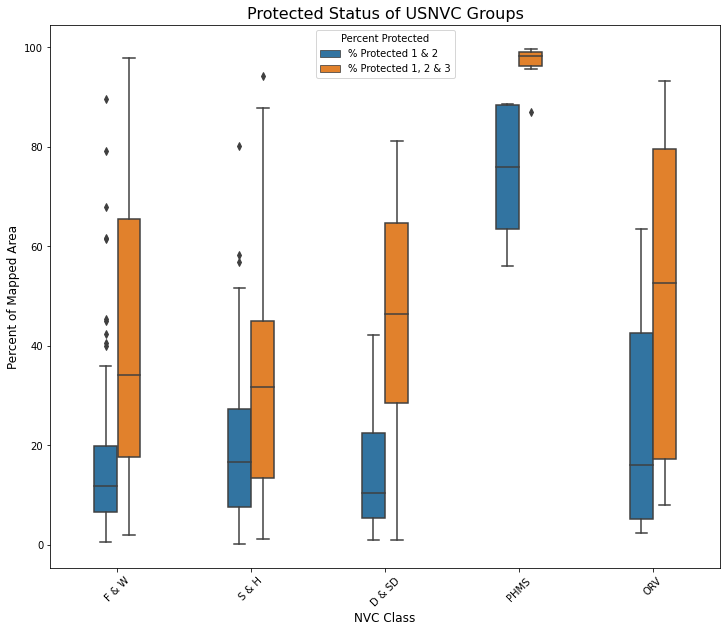

In [45]:
fig, ax = plt.subplots(figsize=(12,10))
plt.xticks(rotation=45)
a = sns.boxplot(data = df3_melt,
                hue = 'Percent Protected',
                x = 'CLASS',
                y = 'Percent of Mapped Area',
                order = ['Forest & Woodland',
                         'Shrub & Herb Vegetation',
                         'Desert & Semi-Desert',
                         'Polar & High Montane Scrub Grassland & Barrens',
                         'Open Rock Vegetation'],
                width=0.35,
                ax=ax)
a.set_xlabel('NVC Class', fontsize=12)
a.set_ylabel('Percent of Mapped Area', fontsize=12)
labels = ['F & W','S & H','D & SD','PHMS','ORV']
a.set_xticklabels(labels)
a.set_title('Protected Status of USNVC Groups', fontsize=16)
plt.legend(loc='upper center',title='Percent Protected')
plt.show()


In [30]:
### Export the pivoted protection dataframe to a CSV
df.to_csv(dataDir+"GroupPercentProtected.csv")

### ******* Protection Level of Macrogroups by Ecoregion ******* <a name="code63"></a>
---

##### Begin by manipulating the dataframe of the raster table and the CSV table

In [46]:
# Rename the Upper Gila Mountains ecoregion with the question mark in it
dfMerge['NA_L2NAME'] = np.where(dfMerge['NA_L2NAME']==
   'UPPER GILA MOUNTAINS (?)',
   'UPPER GILA MOUNTAINS', dfMerge['NA_L2NAME'])

In [47]:
classnames = dfMerge['CLASS'].unique().tolist()
classnames

['7 Agricultural & Developed Vegetation',
 '1 Forest & Woodland',
 nan,
 'Developed-Low Intensity',
 'Developed-Roads',
 'Developed-Medium Intensity',
 'Developed-High Intensity',
 '2 Shrub & Herb Vegetation',
 '6 Open Rock Vegetation',
 'Open Water',
 'Recently Disturbed or Modified',
 'Quarries-Strip Mines-Gravel Pits-Energy Development',
 '3 Desert & Semi-Desert',
 '4 Polar & High Montane Scrub Grassland & Barrens',
 'Nonvascular & Sparse Vascular Rock Vegetation',
 '5 Aquatic Vegetation']

In [48]:
# Pull out only the natural/non-anthropogenic NVC classes
print("Removing Anthropogenic Classes ....")
dfNatural = dfMerge[(dfMerge['CLASS'] == '1 Forest & Woodland') | 
         (dfMerge['CLASS'] == '2 Shrub & Herb Vegetation') | 
         (dfMerge['CLASS'] == '3 Desert & Semi-Desert') | 
         (dfMerge['CLASS'] == '4 Polar & High Montane Scrub Grassland & Barrens') | 
         (dfMerge['CLASS'] == '6 Open Rock Vegetation')]

#######################################################################################
# Exclude Ruderal types in USNVC Groups
dfNatural = dfNatural[~dfNatural['GROUP'].str.contains('Ruderal')]

Removing Anthropogenic Classes ....


In [49]:
## Summarize cell counts across GAP Status, Level 2 Ecoregion, and NVC Macrogroup
sSum = dfNatural.groupby(['GAPST_CD','NA_L2NAME','MACROGRO_1'])['COUNT'].sum()
dfSum = pd.DataFrame(data=sSum)
dfEcoGroupSum = dfSum.reset_index()

# Rename the columns to match previous analyses dataframes
dfEcoGroupSum.rename(columns={'GAPST_CD':'PADStatus',
                           'NA_L2NAME':'Level2Name',
                           'MACROGRO_1':'MacrogroupName',
                           'COUNT':'nCells'},inplace=True)
dfEcoGroupSum

,PADStatus,Level2Name,MacrogroupName,nCells
0,1,ATLANTIC HIGHLANDS,Appalachian & Northeastern Oak-Hardwood & Pine...,27736
1,1,ATLANTIC HIGHLANDS,Appalachian Interior & Northeastern Mesic Forest,450582
2,1,ATLANTIC HIGHLANDS,Appalachian Rocky Felsic & Mafic Scrub & Grass...,8543
3,1,ATLANTIC HIGHLANDS,Central & Appalachian Floodplain Forest,3582
4,1,ATLANTIC HIGHLANDS,Central & Appalachian Swamp Forest,24
...,...,...,...,...
2079,4,WESTERN SIERRA MADRE PIEDMONT,Southwest Riparian Forest,160519
2080,4,WESTERN SIERRA MADRE PIEDMONT,Warm & Cool Desert Alkali-Saline Wetland,325273
2081,4,WESTERN SIERRA MADRE PIEDMONT,Warm Desert Lowland Freshwater Shrubland meado...,79787
2082,4,WESTERN SIERRA MADRE PIEDMONT,Warm Interior Chaparral,1017468


In [50]:
# Get a list of unique Level II Ecoregions
level2ecos = dfEcoGroupSum['Level2Name'].unique().tolist()
level2ecos

['ATLANTIC HIGHLANDS',
 'CENTRAL USA PLAINS',
 'COLD DESERTS',
 'EVERGLADES',
 'MARINE WEST COAST FOREST',
 'MEDITERRANEAN CALIFORNIA',
 'MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL PLAINS',
 'MIXED WOOD PLAINS',
 'MIXED WOOD SHIELD',
 'OZARK/OUACHITA-APPALACHIAN FORESTS',
 'SOUTH CENTRAL SEMI-ARID PRAIRIES',
 'SOUTHEASTERN USA PLAINS',
 'TEMPERATE PRAIRIES',
 'TEXAS-LOUISIANA COASTAL PLAIN',
 'UPPER GILA MOUNTAINS',
 'WARM DESERTS',
 'WEST-CENTRAL SEMI-ARID PRAIRIES',
 'WESTERN CORDILLERA',
 'WESTERN SIERRA MADRE PIEDMONT',
 'TAMAULIPAS-TEXAS SEMIARID PLAIN']

In [51]:
# Pivot the Ecoregion-Macrogrup dataframe on PAD Status
dfPivot = dfEcoGroupSum.pivot(index=['Level2Name','MacrogroupName'], columns=['PADStatus'], values='nCells')
df = dfPivot.reset_index(level=(0,1))
df

PADStatus,Level2Name,MacrogroupName,1,2,3,4
0,ATLANTIC HIGHLANDS,Appalachian & Northeastern Oak-Hardwood & Pine...,27736.0,109934.0,297588.0,1535222.0
1,ATLANTIC HIGHLANDS,Appalachian Interior & Northeastern Mesic Forest,450582.0,398833.0,6058310.0,9499064.0
2,ATLANTIC HIGHLANDS,Appalachian Rocky Felsic & Mafic Scrub & Grass...,8543.0,25472.0,24319.0,195725.0
3,ATLANTIC HIGHLANDS,Atlantic & Gulf Coastal Freshwater & Oligohali...,NaN,765.0,11.0,1100.0
4,ATLANTIC HIGHLANDS,Atlantic & Gulf Coastal Plain Wet Prairie & Marsh,NaN,NaN,1.0,73.0
...,...,...,...,...,...,...
621,WESTERN SIERRA MADRE PIEDMONT,Southwest Riparian Forest,21704.0,36724.0,130122.0,160519.0
622,WESTERN SIERRA MADRE PIEDMONT,Warm & Cool Desert Alkali-Saline Wetland,853.0,20082.0,46624.0,325273.0
623,WESTERN SIERRA MADRE PIEDMONT,Warm Desert Lowland Freshwater Shrubland meado...,1613.0,15722.0,23555.0,79787.0
624,WESTERN SIERRA MADRE PIEDMONT,Warm Interior Chaparral,376229.0,246531.0,1162534.0,1017468.0


In [52]:
# Fill all the empty values with 0 and rename columns
df['PAD1'] = df[1].fillna(0)
df['PAD2'] = df[2].fillna(0)
df['PAD3'] = df[3].fillna(0)
df['PAD4'] = df[4].fillna(0)


# Drop the original PAD status columns
df = df.drop(1, axis=1)
df = df.drop(2, axis=1)
df = df.drop(3, axis=1)
df = df.drop(4, axis=1)

# Add a Group total cell count column
df['nGroupTotalCells'] = df['PAD1'] + df['PAD2'] + df['PAD3'] + df['PAD4']

In [53]:
# Calculate area in km2
df['PAD1 km2'] = df['PAD1'] * 0.0009
df['PAD2 km2'] = df['PAD2'] * 0.0009
df['PAD3 km2'] = df['PAD3'] * 0.0009
df['PAD4 km2'] = df['PAD4'] * 0.0009


# Calculate percentages
df['% Protected 1 & 2'] = ((df['PAD1'] + df['PAD2'] ) / df['nGroupTotalCells']) * 100
df['% Protected 1, 2 & 3'] = ((df['PAD1'] + df['PAD2'] + df['PAD3']) / df['nGroupTotalCells']) * 100

In [54]:
# Pull out the columns to use for calculating summaries of protection percentage
df2 = df[['Level2Name','MacrogroupName','% Protected 1 & 2']]
df2

PADStatus,Level2Name,MacrogroupName,% Protected 1 & 2
0,ATLANTIC HIGHLANDS,Appalachian & Northeastern Oak-Hardwood & Pine...,6.986623
1,ATLANTIC HIGHLANDS,Appalachian Interior & Northeastern Mesic Forest,5.177217
2,ATLANTIC HIGHLANDS,Appalachian Rocky Felsic & Mafic Scrub & Grass...,13.388622
3,ATLANTIC HIGHLANDS,Atlantic & Gulf Coastal Freshwater & Oligohali...,40.778252
4,ATLANTIC HIGHLANDS,Atlantic & Gulf Coastal Plain Wet Prairie & Marsh,0.000000
...,...,...,...
621,WESTERN SIERRA MADRE PIEDMONT,Southwest Riparian Forest,16.738238
622,WESTERN SIERRA MADRE PIEDMONT,Warm & Cool Desert Alkali-Saline Wetland,5.329250
623,WESTERN SIERRA MADRE PIEDMONT,Warm Desert Lowland Freshwater Shrubland meado...,14.364792
624,WESTERN SIERRA MADRE PIEDMONT,Warm Interior Chaparral,22.219511


In [49]:
# Export this dataframe to a CSV
df2.to_csv(workDir+"df2-EcoregionsPercentProtected.csv",index=False)

In [55]:
# Create the protection bins and make appropriate labels for them and summarize by ecoregions
bins = [-1,1,17,30,100]
groups = df2.groupby(['Level2Name', pd.cut(df2['% Protected 1 & 2'], bins, labels=["< 1%", "1 - 17%", "17 - 30%", "> 30%"])])

# Unstack the summarized dataframe
dfUnstk = groups.size().unstack()
# Export the unstacked dataframe to a CSV
dfUnstk.to_csv(workDir+"MacrogroupPercentProtectedbyEcoregion.csv")

In [56]:
dfUnstk

% Protected 1 & 2,< 1%,1 - 17%,17 - 30%,> 30%
Level2Name,,,,
ATLANTIC HIGHLANDS,3,11,6,2
CENTRAL USA PLAINS,4,14,2,2
COLD DESERTS,9,23,6,8
EVERGLADES,2,2,7,3
MARINE WEST COAST FOREST,3,13,5,3
MEDITERRANEAN CALIFORNIA,2,11,8,13
MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL PLAINS,5,16,8,8
MIXED WOOD PLAINS,2,17,6,3
MIXED WOOD SHIELD,1,3,8,7


### Protection Level of NVC Macrgroups within Level II Ecoregions <a name="macrogroupchart"></a>

Text(0.5, 0, '# of Macrogroups')

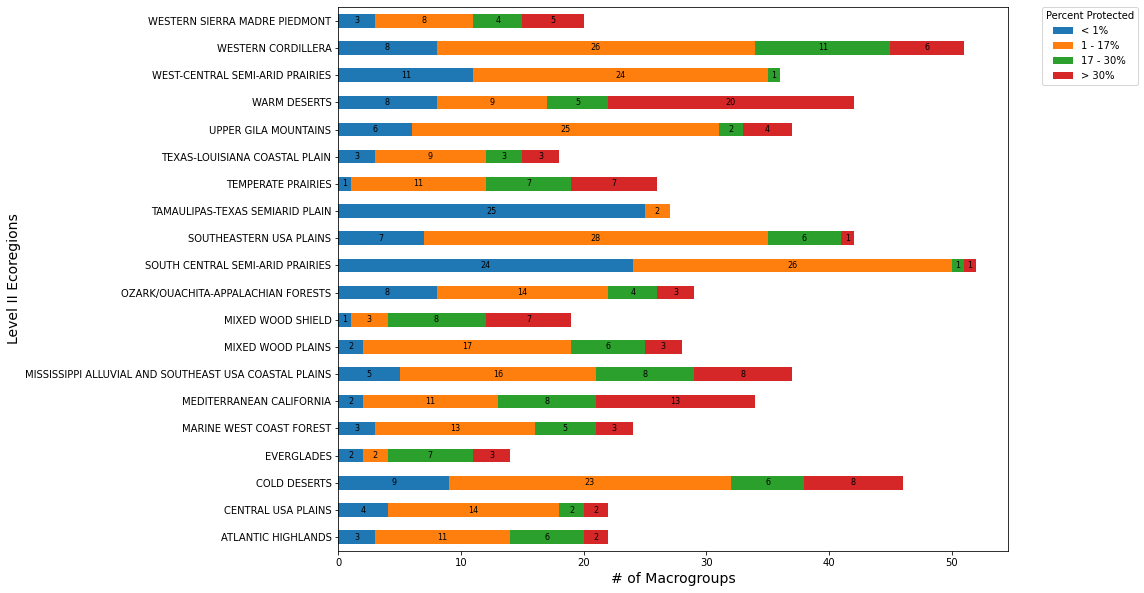

In [57]:
# Plot the unstacked dataframe using horizontal bar plot from Pandas/Matplotlib
ax = dfUnstk.plot.barh(stacked=True, figsize=(12, 10))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{width:.0f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), title='Percent Protected', loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel("Level II Ecoregions", fontsize=14)
ax.set_xlabel("# of Macrogroups", fontsize=14)

### ******* Protection Level of Groups by Ecoregion ******* <a name="code64"></a>
---

##### Begin by manipulating the dataframe of the raster table and the CSV table

In [58]:
# Rename the Upper Gila Mountains ecoregion with the question mark in it
dfMerge['NA_L2NAME'] = np.where(dfMerge['NA_L2NAME']==
   'UPPER GILA MOUNTAINS (?)',
   'UPPER GILA MOUNTAINS', dfMerge['NA_L2NAME'])

In [59]:
# Pull out only the natural/non-anthropogenic NVC classes
print("Removing Anthropogenic Classes ....")
dfNatural = dfMerge[(dfMerge['CLASS'] == '1 Forest & Woodland') | 
         (dfMerge['CLASS'] == '2 Shrub & Herb Vegetation') | 
         (dfMerge['CLASS'] == '3 Desert & Semi-Desert') | 
         (dfMerge['CLASS'] == '4 Polar & High Montane Scrub Grassland & Barrens') | 
         (dfMerge['CLASS'] == '6 Open Rock Vegetation')]

#######################################################################################
# Exclude Ruderal types in USNVC Groups
dfNatural = dfNatural[~dfNatural['GROUP'].str.contains('Ruderal')]

Removing Anthropogenic Classes ....


In [60]:
## Summarize cell counts across GAP Status, Level 2 Ecoregion, and NVC Group
sSum = dfNatural.groupby(['GAPST_CD','NA_L2NAME','GROUP'])['COUNT'].sum()
dfSum = pd.DataFrame(data=sSum)
dfEcoGroupSum = dfSum.reset_index()

# Rename the columns to match previous analyses dataframes
dfEcoGroupSum.rename(columns={'GAPST_CD':'PADStatus',
                           'NA_L2NAME':'Level2Name',
                           'GROUP':'GroupName',
                           'COUNT':'nCells'},inplace=True)
dfEcoGroupSum

,PADStatus,Level2Name,GroupName,nCells
0,1,ATLANTIC HIGHLANDS,Eastern Boreal Balsam Fir-Black Spruce Interm...,513
1,1,ATLANTIC HIGHLANDS,Appalachian & Allegheny Northern Hardwood-Coni...,450582
2,1,ATLANTIC HIGHLANDS,Eastern Alpine Dwarf-Shrub-Herb Vegetation,13608
3,1,ATLANTIC HIGHLANDS,Eastern Boreal Black Spruce-Tamarack Poor Swamp,4380
4,1,ATLANTIC HIGHLANDS,Eastern North American Boreal Acidic Bog & Fen,6705
...,...,...,...,...
3937,4,WESTERN SIERRA MADRE PIEDMONT,Southern Rocky Mountain White Fir-Douglas-fir ...,2648
3938,4,WESTERN SIERRA MADRE PIEDMONT,Warm Semi-Desert Shrub & Herb Dry Wash & Collu...,82896
3939,4,WESTERN SIERRA MADRE PIEDMONT,Warm Southwest Riparian Forest & Woodland,160519
3940,4,WESTERN SIERRA MADRE PIEDMONT,Western Madrean Chaparral,1017468


In [61]:
# Get a list of unique Level II Ecoregions
level2ecos = dfEcoGroupSum['Level2Name'].unique().tolist()
level2ecos

['ATLANTIC HIGHLANDS',
 'CENTRAL USA PLAINS',
 'COLD DESERTS',
 'EVERGLADES',
 'MARINE WEST COAST FOREST',
 'MEDITERRANEAN CALIFORNIA',
 'MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL PLAINS',
 'MIXED WOOD PLAINS',
 'MIXED WOOD SHIELD',
 'OZARK/OUACHITA-APPALACHIAN FORESTS',
 'SOUTH CENTRAL SEMI-ARID PRAIRIES',
 'SOUTHEASTERN USA PLAINS',
 'TEMPERATE PRAIRIES',
 'TEXAS-LOUISIANA COASTAL PLAIN',
 'UPPER GILA MOUNTAINS',
 'WARM DESERTS',
 'WEST-CENTRAL SEMI-ARID PRAIRIES',
 'WESTERN CORDILLERA',
 'WESTERN SIERRA MADRE PIEDMONT',
 'TAMAULIPAS-TEXAS SEMIARID PLAIN']

In [62]:
# Pivot the Ecoregion-Macrogrup dataframe on PAD Status
dfPivot = dfEcoGroupSum.pivot(index=['Level2Name','GroupName'], columns=['PADStatus'], values='nCells')
df = dfPivot.reset_index(level=(0,1))
df

PADStatus,Level2Name,GroupName,1,2,3,4
0,ATLANTIC HIGHLANDS,Eastern Boreal Balsam Fir-Black Spruce Interm...,513.0,1593.0,1136.0,15488.0
1,ATLANTIC HIGHLANDS,Appalachian & Allegheny Northern Hardwood-Coni...,450582.0,398833.0,6058310.0,9499041.0
2,ATLANTIC HIGHLANDS,Appalachian & Interior Mesic Forest,NaN,NaN,NaN,23.0
3,ATLANTIC HIGHLANDS,Appalachian & Interior Riverscour Barrens & Pr...,NaN,NaN,NaN,1.0
4,ATLANTIC HIGHLANDS,Appalachian Oak/Chestnut Forest,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...
1212,WESTERN SIERRA MADRE PIEDMONT,Southern Rocky Mountain White Fir-Douglas-fir ...,11811.0,9517.0,15371.0,2648.0
1213,WESTERN SIERRA MADRE PIEDMONT,Warm Semi-Desert Shrub & Herb Dry Wash & Collu...,856.0,2158.0,52446.0,82896.0
1214,WESTERN SIERRA MADRE PIEDMONT,Warm Southwest Riparian Forest & Woodland,21704.0,36724.0,130122.0,160519.0
1215,WESTERN SIERRA MADRE PIEDMONT,Western Madrean Chaparral,376229.0,246531.0,1162534.0,1017468.0


In [63]:
# Fill all the empty values with 0 and rename columns
df['PAD1'] = df[1].fillna(0)
df['PAD2'] = df[2].fillna(0)
df['PAD3'] = df[3].fillna(0)
df['PAD4'] = df[4].fillna(0)


# Drop the original PAD status columns
df = df.drop(1, axis=1)
df = df.drop(2, axis=1)
df = df.drop(3, axis=1)
df = df.drop(4, axis=1)

# Add a Group total cell count column
df['nGroupTotalCells'] = df['PAD1'] + df['PAD2'] + df['PAD3'] + df['PAD4']

In [64]:
# Calculate area in km2
df['PAD1 km2'] = df['PAD1'] * 0.0009
df['PAD2 km2'] = df['PAD2'] * 0.0009
df['PAD3 km2'] = df['PAD3'] * 0.0009
df['PAD4 km2'] = df['PAD4'] * 0.0009


# Calculate percentages
df['% Protected 1 & 2'] = ((df['PAD1'] + df['PAD2'] ) / df['nGroupTotalCells']) * 100
df['% Protected 1, 2 & 3'] = ((df['PAD1'] + df['PAD2'] + df['PAD3']) / df['nGroupTotalCells']) * 100

# Pull out the columns to use for calculating summaries of protection percentage
df2 = df[['Level2Name','GroupName','% Protected 1 & 2']]
df2

PADStatus,Level2Name,GroupName,% Protected 1 & 2
0,ATLANTIC HIGHLANDS,Eastern Boreal Balsam Fir-Black Spruce Interm...,11.243994
1,ATLANTIC HIGHLANDS,Appalachian & Allegheny Northern Hardwood-Coni...,5.177224
2,ATLANTIC HIGHLANDS,Appalachian & Interior Mesic Forest,0.000000
3,ATLANTIC HIGHLANDS,Appalachian & Interior Riverscour Barrens & Pr...,0.000000
4,ATLANTIC HIGHLANDS,Appalachian Oak/Chestnut Forest,0.000000
...,...,...,...
1212,WESTERN SIERRA MADRE PIEDMONT,Southern Rocky Mountain White Fir-Douglas-fir ...,54.204895
1213,WESTERN SIERRA MADRE PIEDMONT,Warm Semi-Desert Shrub & Herb Dry Wash & Collu...,2.178438
1214,WESTERN SIERRA MADRE PIEDMONT,Warm Southwest Riparian Forest & Woodland,16.738238
1215,WESTERN SIERRA MADRE PIEDMONT,Western Madrean Chaparral,22.219511


In [65]:
# Create the protection bins and make appropriate labels for them and summarize by ecoregions
bins = [-1,1,17,30,100]
groups = df2.groupby(['Level2Name', pd.cut(df2['% Protected 1 & 2'], bins, labels=["< 1%", "1 - 17%", "17 - 30%", "> 30%"])])

# Unstack the summarized dataframe
dfUnstk = groups.size().unstack()
# Export the unstacked dataframe to a CSV
dfUnstk.to_csv(workDir+"GroupPercentProtectedbyEcoregion.csv")
dfUnstk

% Protected 1 & 2,< 1%,1 - 17%,17 - 30%,> 30%
Level2Name,,,,
ATLANTIC HIGHLANDS,7,22,8,5
CENTRAL USA PLAINS,13,19,4,5
COLD DESERTS,19,53,13,16
EVERGLADES,4,3,7,5
MARINE WEST COAST FOREST,7,21,9,7
MEDITERRANEAN CALIFORNIA,9,18,11,17
MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL PLAINS,8,29,17,19
MIXED WOOD PLAINS,7,46,8,5
MIXED WOOD SHIELD,4,7,11,13


### Protection Level of NVC Groups within Level II Ecoregions <a name="groupchart"></a>

Text(0.5, 0, '# of Groups')

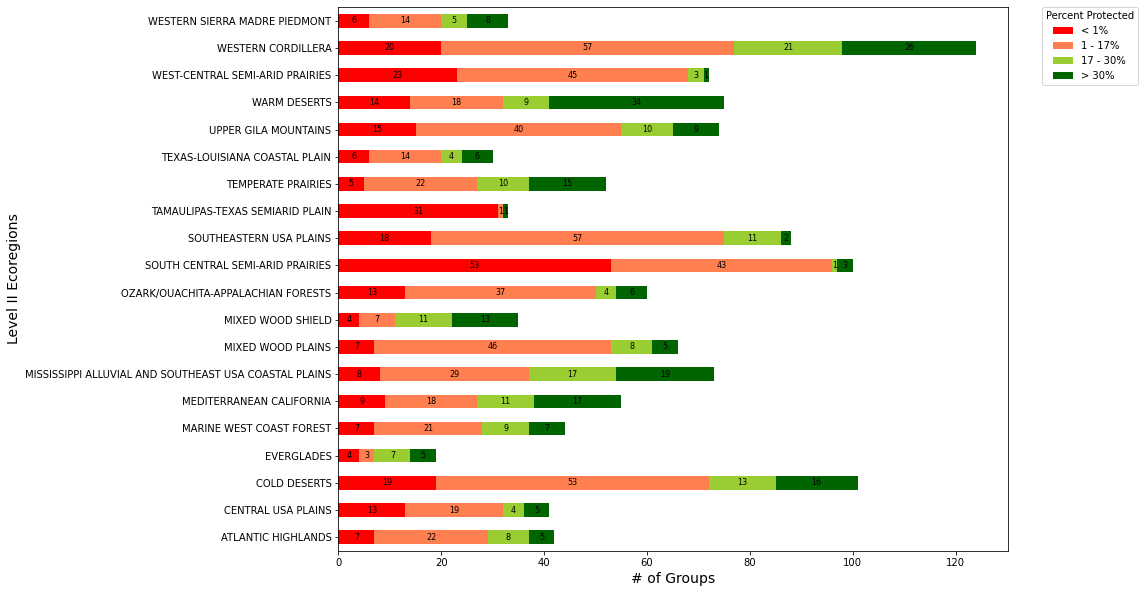

In [66]:
# Plot the unstacked dataframe using horizontal bar plot from Pandas/Matplotlib
ax = dfUnstk.plot.barh(stacked=True, figsize=(12, 10), 
                       color={"< 1%":"red",
                              "1 - 17%":"coral",
                              "17 - 30%":"yellowgreen",
                              "> 30%":"darkgreen"})

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{width:.0f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), title='Percent Protected', loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel("Level II Ecoregions", fontsize=14)
ax.set_xlabel("# of Groups", fontsize=14)

### ******* PAD Level Percentages by Ecoregion ******* <a name="code65"></a>
---

##### Begin by manipulating the dataframe of the raster table and the CSV table

In [67]:
# Rename the Upper Gila Mountains ecoregion with the question mark in it
dfMerge['NA_L2NAME'] = np.where(dfMerge['NA_L2NAME']==
   'UPPER GILA MOUNTAINS (?)',
   'UPPER GILA MOUNTAINS', dfMerge['NA_L2NAME'])

#### Add a column named NaturalType to distinguish between "converted" and "not converted" lands based on USNVC Class
USNVC Classes classified as "Not Converted" include:
* 1 Forest & Woodland
* 2 Shrub & Herb Vegetation
* 3 Desert & Semi-Desert
* 4 Polar & High Montane Scrub Grassland & Barrens
* 5 Aquatic Vegetation
* 6 Open Rock Vegetation

All other USNVC Classes are classified as "Converted" with the exception of Open Water which is removed from the analyses

In [68]:
# Add NaturalType column making Classes 1-6 'Not Converted'
dfMerge.loc[(dfMerge.CLASS == '1 Forest & Woodland')|
            (dfMerge.CLASS == '2 Shrub & Herb Vegetation')|
            (dfMerge.CLASS == '3 Desert & Semi-Desert')|
            (dfMerge.CLASS == '4 Polar & High Montane Scrub Grassland & Barrens')|
            (dfMerge.CLASS == '5 Aquatic Vegetation')|
            (dfMerge.CLASS == '6 Open Rock Vegetation'),'NaturalType']='Not Converted'

# Make all other Classes 'Converted'
dfMerge.loc[(dfMerge.CLASS == '7 Agricultural & Developed Vegetation')|
            (dfMerge.CLASS == 'Nonvascular & Sparse Vascular Rock Vegetation')|
            (dfMerge.CLASS == 'Developed-High Intensity')|
            (dfMerge.CLASS == 'Developed-Low Intensity')|
            (dfMerge.CLASS == 'Developed-Medium Intensity')|
            (dfMerge.CLASS == 'Developed-Roads')|
            (dfMerge.CLASS == 'Open Water')|
            (dfMerge.CLASS == 'Quarries-Strip Mines-Gravel Pits-Energy Development')|
            (dfMerge.CLASS == 'Recently Disturbed or Modified')|
            (dfMerge.CLASS.isnull()),'NaturalType']='Converted'

In [69]:
len(dfMerge)

864468

#### Exclude Open Water from the analyses

In [70]:
# Exclude Open Water types in CLASS from the analyses
dfNoWater = dfMerge[~(dfMerge['CLASS']=='Open Water')]

#### Place all USNVC Groups that are plantations and in Class '7 Agricultural & Developed Vegetation' in the "Not Converted" type
There is only one Group that is a plantation and is in the USNVC Class '7 Agricultural & Developed Vegetation' =>
  'Eastern North America Temperate Forest Plantations'

In [71]:
dfNoWater.loc[(dfNoWater['GROUP']==('Eastern North American Temperate Forest Plantation')),'NaturalType']='Not Converted'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [72]:
## Subset the complete dataframe to work with only relevant columns
dfSub = dfNoWater[['COUNT',
    'GAPST_CD',
    'CLASS',
    'GROUP',
    'NA_L2NAME',
    'NaturalType']]

# Rename the GAPST_CD column
dfSub.rename(columns={'GAPST_CD':'PADStatus'},inplace=True)

## Summarize cell counts across Ecoregion to get total cells in each Ecoregion
sSum = dfNoWater.groupby(['NA_L2NAME'])['COUNT'].sum()
dfSum = pd.DataFrame(data=sSum)
dfEcoTot = dfSum.reset_index()

# Rename the columns to match previous analyses dataframes
dfEcoTot.rename(columns={'NA_L2NAME':'Ecoregion',
                         'COUNT':'EcoregionTotal'},inplace=True)
dfEcoTot

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Ecoregion,EcoregionTotal
0,ATLANTIC HIGHLANDS,162575644
1,CENTRAL USA PLAINS,247711403
2,COLD DESERTS,1099143051
3,EVERGLADES,22725854
4,MARINE WEST COAST FOREST,94126610
5,MEDITERRANEAN CALIFORNIA,174703398
6,MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL...,363533764
7,MIXED WOOD PLAINS,422952107
8,MIXED WOOD SHIELD,225227989
9,OZARK/OUACHITA-APPALACHIAN FORESTS,569224282


In [73]:
dfS5 = pd.merge(left=dfSub, right=dfEcoTot, how='inner',
                   left_on=['NA_L2NAME'],
                   right_on=['Ecoregion'])

# Drop one of the Ecoregion name columns since they are redundant
dfS5 = dfS5.drop(['NA_L2NAME'], axis=1)


In [74]:
dfS5.head(5)

,COUNT,PADStatus,CLASS,GROUP,NaturalType,Ecoregion,EcoregionTotal
0,51,3,7 Agricultural & Developed Vegetation,Temperate Tree Developed Vegetation,Converted,MARINE WEST COAST FOREST,94126610
1,33735,4,1 Forest & Woodland,North Pacific Maritime Douglas-fir-Western Hem...,Not Converted,MARINE WEST COAST FOREST,94126610
2,866,4,NaN,NaN,Converted,MARINE WEST COAST FOREST,94126610
3,62,3,7 Agricultural & Developed Vegetation,Temperate Tree Developed Vegetation,Converted,MARINE WEST COAST FOREST,94126610
4,120,3,Developed-Low Intensity,Developed-Low Intensity,Converted,MARINE WEST COAST FOREST,94126610


#### Summarize by Ecoregion, PAD Status, and Ecoregion Total Cell Count summing across COUNT

In [75]:
## Summarize cell counts across Ecoregion, PAD Status, and Ecoregion Total
s5Sum = dfS5.groupby(['Ecoregion','PADStatus','EcoregionTotal'])['COUNT'].sum()
df5Sum = pd.DataFrame(data=s5Sum)
dfS6 = df5Sum.reset_index()

In [76]:
dfS6

,Ecoregion,PADStatus,EcoregionTotal,COUNT
0,ATLANTIC HIGHLANDS,1,162575644,3593092
1,ATLANTIC HIGHLANDS,2,162575644,18407225
2,ATLANTIC HIGHLANDS,3,162575644,24310482
3,ATLANTIC HIGHLANDS,4,162575644,116264845
4,CENTRAL USA PLAINS,1,247711403,46304
...,...,...,...,...
74,WESTERN CORDILLERA,4,913606309,286470061
75,WESTERN SIERRA MADRE PIEDMONT,1,44042462,2248571
76,WESTERN SIERRA MADRE PIEDMONT,2,44042462,3223167
77,WESTERN SIERRA MADRE PIEDMONT,3,44042462,13408660


#### Pull out PAD Status 1 & 2 rows from the summarized dataframe above (dfS6)

In [77]:
dfS7 = dfS6[(dfS6['PADStatus'] == 1)|(dfS6['PADStatus'] == 2)]

Now summarize cell counts by Ecoregion for PAD 1 & 2 and calculate the percentage of total for the Ecoregion

In [78]:
## Summarize cell counts across Ecoregion for PAD 1 & 2
s7Sum = dfS7.groupby(['Ecoregion','EcoregionTotal'])['COUNT'].sum()
df7Sum = pd.DataFrame(data=s7Sum)
dfS7a = df7Sum.reset_index()

## Add a column that is the percent PAD 1 & 2 within each Ecoregion
dfS7a['% PAD 1 & 2'] = (dfS7a['COUNT']  / dfS7a['EcoregionTotal']) * 100

In [79]:
dfS7a

,Ecoregion,EcoregionTotal,COUNT,% PAD 1 & 2
0,ATLANTIC HIGHLANDS,162575644,22000317,13.532357
1,CENTRAL USA PLAINS,247711403,4096357,1.653681
2,COLD DESERTS,1099143051,118377089,10.769944
3,EVERGLADES,22725854,5504637,24.221915
4,MARINE WEST COAST FOREST,94126610,7316011,7.772522
5,MEDITERRANEAN CALIFORNIA,174703398,18676579,10.690450
6,MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL...,363533764,29924875,8.231663
7,MIXED WOOD PLAINS,422952107,13401276,3.168509
8,MIXED WOOD SHIELD,225227989,51879532,23.034230
9,OZARK/OUACHITA-APPALACHIAN FORESTS,569224282,39620800,6.960490


In [80]:
## Drop all columns but Ecoregion and the percentage PAD 1 & 2
dfPAD12 = dfS7a.drop(['EcoregionTotal','COUNT'], axis=1)

In [81]:
dfPAD12

,Ecoregion,% PAD 1 & 2
0,ATLANTIC HIGHLANDS,13.532357
1,CENTRAL USA PLAINS,1.653681
2,COLD DESERTS,10.769944
3,EVERGLADES,24.221915
4,MARINE WEST COAST FOREST,7.772522
5,MEDITERRANEAN CALIFORNIA,10.690450
6,MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL...,8.231663
7,MIXED WOOD PLAINS,3.168509
8,MIXED WOOD SHIELD,23.034230
9,OZARK/OUACHITA-APPALACHIAN FORESTS,6.960490


#### Pull out PAD Status 3 rows from the summarized dataframe above (dfS6)

In [82]:
dfS8 = dfS6[(dfS6['PADStatus'] == 3)]

In [83]:
## Add a column that is the percent PAD 3 within each Ecoregion
dfS8['% PAD 3'] = (dfS8['COUNT'] / dfS8['EcoregionTotal']) * 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
## Drop all columns but Ecoregion and the percentage PAD 3
dfPAD3 = dfS8.drop(['EcoregionTotal','COUNT','PADStatus'], axis=1)

In [85]:
dfPAD3

,Ecoregion,% PAD 3
2,ATLANTIC HIGHLANDS,14.953336
6,CENTRAL USA PLAINS,0.280010
10,COLD DESERTS,47.151912
14,EVERGLADES,34.550033
18,MARINE WEST COAST FOREST,20.426210
22,MEDITERRANEAN CALIFORNIA,9.432780
26,MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL...,7.890960
30,MIXED WOOD PLAINS,2.825663
34,MIXED WOOD SHIELD,16.202955
38,OZARK/OUACHITA-APPALACHIAN FORESTS,7.547608


#### Pull out PAD Status 4 rows from the original summarized dataframe above (dfS5)

In [86]:
dfS9 = dfS5[(dfS5['PADStatus'] == 4)]

Summarize by Ecoregion, NaturalType, and EcoregionTotal and sum on COUNT to get counts for "Converted" & "Not Converted"

In [87]:
## Summarize cell counts across Ecoregion for PAD 1 & 2
s9Sum = dfS9.groupby(['Ecoregion','EcoregionTotal','NaturalType'])['COUNT'].sum()
df9Sum = pd.DataFrame(data=s9Sum)
dfS9a = df9Sum.reset_index()

## Add a column that is the percent PAD 4 within each Ecoregion
dfS9a['% PAD 4'] = (dfS9a['COUNT']  / dfS9a['EcoregionTotal']) * 100

## Drop all columns but Ecoregion and the percentage PAD 4
dfPAD4 = dfS9a.drop(['EcoregionTotal','COUNT'], axis=1)

In [88]:
dfPAD4

,Ecoregion,NaturalType,% PAD 4
0,ATLANTIC HIGHLANDS,Converted,10.996848
1,ATLANTIC HIGHLANDS,Not Converted,60.517459
2,CENTRAL USA PLAINS,Converted,84.572798
3,CENTRAL USA PLAINS,Not Converted,13.493511
4,COLD DESERTS,Converted,9.342293
5,COLD DESERTS,Not Converted,32.735851
6,EVERGLADES,Converted,29.373343
7,EVERGLADES,Not Converted,11.854710
8,MARINE WEST COAST FOREST,Converted,27.185084
9,MARINE WEST COAST FOREST,Not Converted,44.616185


#### Pivot the above dataframe to get NaturalType into 2 new columns: % PAD 4 Converted; % PAD 4 Not Converted

In [89]:
dfPAD4Pivot = dfPAD4.pivot(index=['Ecoregion'], columns=['NaturalType'], values='% PAD 4')
dfPAD4Type = dfPAD4Pivot.reset_index(level=(0))
dfPAD4Type

NaturalType,Ecoregion,Converted,Not Converted
0,ATLANTIC HIGHLANDS,10.996848,60.517459
1,CENTRAL USA PLAINS,84.572798,13.493511
2,COLD DESERTS,9.342293,32.735851
3,EVERGLADES,29.373343,11.854710
4,MARINE WEST COAST FOREST,27.185084,44.616185
5,MEDITERRANEAN CALIFORNIA,38.765350,41.111421
6,MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL...,45.808740,38.068637
7,MIXED WOOD PLAINS,48.985427,45.020401
8,MIXED WOOD SHIELD,12.277550,48.485265
9,OZARK/OUACHITA-APPALACHIAN FORESTS,28.117150,57.374752


In [90]:
# Rename the two natural type percentage columns
dfPAD4Type.rename(columns={'Converted':'% PAD 4 Converted','Not Converted':'% PAD 4 Not Converted'},inplace=True)

In [91]:
dfPAD4Type

NaturalType,Ecoregion,% PAD 4 Converted,% PAD 4 Not Converted
0,ATLANTIC HIGHLANDS,10.996848,60.517459
1,CENTRAL USA PLAINS,84.572798,13.493511
2,COLD DESERTS,9.342293,32.735851
3,EVERGLADES,29.373343,11.854710
4,MARINE WEST COAST FOREST,27.185084,44.616185
5,MEDITERRANEAN CALIFORNIA,38.765350,41.111421
6,MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL...,45.808740,38.068637
7,MIXED WOOD PLAINS,48.985427,45.020401
8,MIXED WOOD SHIELD,12.277550,48.485265
9,OZARK/OUACHITA-APPALACHIAN FORESTS,28.117150,57.374752


#### Concatenate all the subsetted dataframes of PAD 1&2, PAD 3, and PAD 4 into a single dataframe

In [92]:
df1 = dfPAD12.copy()
df2 = dfPAD3.copy()
df3 = dfPAD4Type.copy()

In [93]:
## First set the index for all 3 dataframes as the Ecoregion name
df1.set_index('Ecoregion',inplace=True)
df2.set_index('Ecoregion',inplace=True)
df3.set_index('Ecoregion',inplace=True)

dfC = pd.concat([df1,df2,df3],axis=1)

In [94]:
dfC

,% PAD 1 & 2,% PAD 3,% PAD 4 Converted,% PAD 4 Not Converted
Ecoregion,,,,
ATLANTIC HIGHLANDS,13.532357,14.953336,10.996848,60.517459
CENTRAL USA PLAINS,1.653681,0.280010,84.572798,13.493511
COLD DESERTS,10.769944,47.151912,9.342293,32.735851
EVERGLADES,24.221915,34.550033,29.373343,11.854710
MARINE WEST COAST FOREST,7.772522,20.426210,27.185084,44.616185
MEDITERRANEAN CALIFORNIA,10.690450,9.432780,38.765350,41.111421
MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL PLAINS,8.231663,7.890960,45.808740,38.068637
MIXED WOOD PLAINS,3.168509,2.825663,48.985427,45.020401
MIXED WOOD SHIELD,23.034230,16.202955,12.277550,48.485265


### PAD Percentanges within Level II Ecoregions <a name="ecostackchart"></a>

<Figure size 1200x800 with 0 Axes>

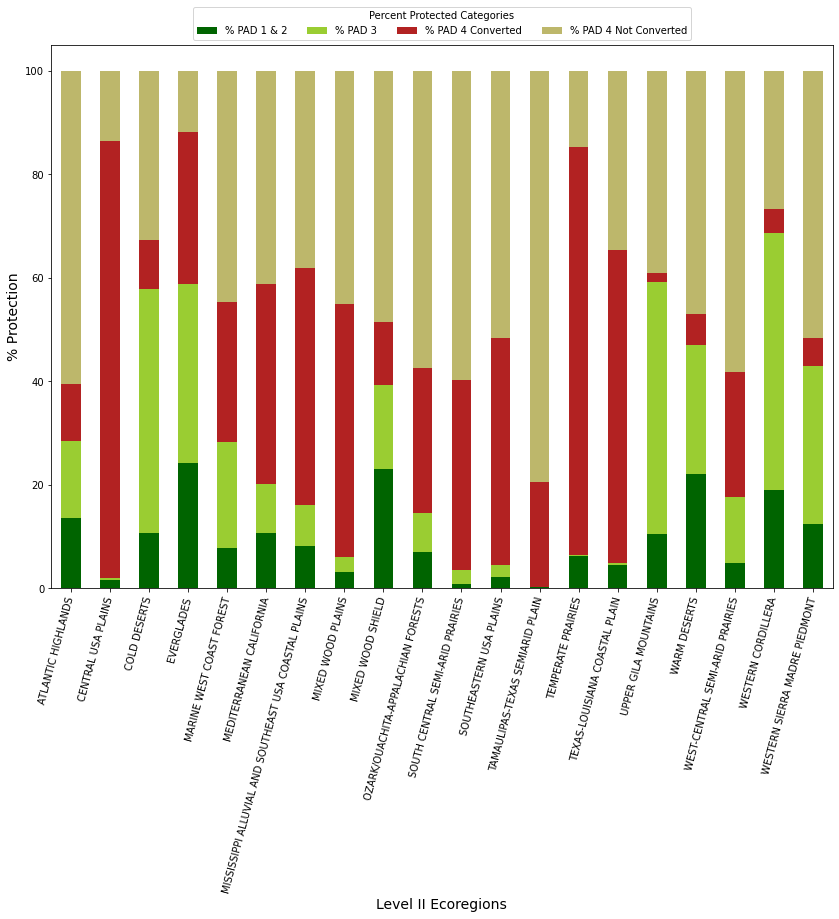

In [95]:
# Plot final dataframe using a stacked bar plot from Pandas/Matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(dpi=200)

ax = dfC.plot.bar(stacked=True, figsize=(14, 10),
                       color={"% PAD 1 & 2":"darkgreen",
                              "% PAD 3":"yellowgreen",
                              "% PAD 4 Converted":"firebrick",
                              "% PAD 4 Not Converted":"darkkhaki"})
# move the legend
ax.legend(bbox_to_anchor=(0.5, 1.07),
          ncol=4,
          title='Percent Protected Categories',
          loc='upper center', borderaxespad=0.) 

# add labels
ax.set_ylabel("% Protection", fontsize=14)
ax.set_xlabel("Level II Ecoregions", fontsize=14)

ax.set_xticklabels(labels=dfC.index, rotation=75, ha='right')

# create offset transform (x=5pt)
from matplotlib.transforms import ScaledTranslation
dx, dy = 5, 0
offset = ScaledTranslation(dx/fig.dpi, dy/fig.dpi, scale_trans=fig.dpi_scale_trans)

# apply offset transform to all xticklabels
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

## Citations <a name="citations"></a>
Aycrigg, J. L., Davidson, A., Svancara, L. K., Gergely, K. J., McKerrow, A.J., & Scott, M. (2013). Representation of ecological systems within the protected areas network of the continental United States. PLoSONE, 8(1), e54689. https://doi.org/10.1371/journal.pone.0054689

McKerrow, A. J., A. Davidson, T. S. Earnhardt, A. L. Benson. 2014.  Integrating Recent Land Cover Mapping Efforts to Update the National Gap Analysis Program’s Species Habitat Map.  Int. Arch. Photogramm. Remote Sens. Spatial Inf. Sci., XL-1, 245-252, 2014. 
www.int-arch-photogramm-remote-sens-spatial-inf-sci.net/XL-1/245/2014/
doi:10.5194/isprsarchives-XL-1-245-2014

U.S. Geological Survey, Gap Analysis Program. (2016). Protected Areas Database of the United States (PAD-US), version 1.4 Combined Feature Class. https://doi.org/10.5066/F7G73BSZ

U.S. Geological Survey Gap Analysis Program, 20160513, GAP/LANDFIRE National Terrestrial Ecosystems 2011: U.S. Geological Survey, https://doi.org/10.5066/F7ZS2TM0.

USNVC [United States National Vegetation Classification]. 2017. United States National Vegetation Classification Database, V2.01. Federal Geographic Data Committee, Vegetation Subcommittee, Washington DC. [usnvc.org/explore-classification/] (accessed 30 March 2017).